In [1]:
import os 
import sys
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:


def classify(point, pandemic) : 
    if pandemic[point] < 100 : 
        return ('stable')
    der = (1/7)*(pandemic[point+7] - pandemic[point]) / pandemic[point]
    derder=(1/49) * (pandemic[point + 7] + pandemic[point-7] - 2*pandemic[point] ) / pandemic[point]
    if  der < -0.05: 
        return  'big decrease'
    elif der <-0.03:
        return 'decrease'
    elif der < 0.03 :
        if abs(derder) > 0.003 : 
            return 'inflexion'
        else :
            return 'stable'
    elif der < 0.2 :
        return 'increase'
    else : 
        return 'big increase'
    

In [4]:
dicocolor={'big decrease':'green', 'decrease':'lightgreen', 'stable':'yellow', 'increase':'orange', 'big increase':'red', 'inflexion':'blue'}

In [ ]:
xs=[5*i for i in range(1, 59)]

countstable=0
countdecrease=0
countincrease=0
countbigdecrease=0
countbigincrease=0
countinflexion=0

for mob in range(4): 
    for pand in range(5): 
        label_seen = {}

        df= pd.read_csv('./all_pandemics/pandemic_'+str(mob)+'_'+str(pand)+'.csv')
        df.index=['n_hospitalized', 'n_infectious', 'mobility', 'r_eff']
        df.drop(['Unnamed: 0'], axis=1, inplace=True)
        n_hospitalized = np.array(df.loc['n_hospitalized'])
        plt.plot(n_hospitalized)
        for x in xs : 
            if classify(x, n_hospitalized) == 'stable' : 
                countstable+=1
            if classify(x, n_hospitalized) == 'decrease' : 
                countdecrease+=1
            if classify(x, n_hospitalized) == 'increase' : 
                countincrease+=1
            if classify(x, n_hospitalized) == 'big decrease' : 
                countbigdecrease+=1
            if classify(x, n_hospitalized) == 'big increase' : 
                countbigincrease+=1
            if classify(x, n_hospitalized) == 'inflexion' : 
                countinflexion+=1
            label = classify(x, n_hospitalized)
            if label not in label_seen:
                plt.plot(x, n_hospitalized[x], 'o', color=dicocolor[label], label=label)
                label_seen[label] = True
            else:
                plt.plot(x, n_hospitalized[x], 'o', color=dicocolor[label])
        plt.title('mobility = '+str(mob)+', pandemic = '+str(pand))
        plt.legend()
        plt.show()

    
print('stable = ' +str(countstable))
print('decrease = ' +str(countdecrease))
print('increase = ' +str(countincrease))
print('big decrease = ' +str(countbigdecrease))
print('big increase = ' +str(countbigincrease))
print('inflexion = ' +str(countinflexion))


In [12]:
models1Dnames=['ARIMA', 'Exponential', 'Moving Average', 'SIRH1', 'SIRH2', 'SIRH3', 'SIRH4', 'Linear Regression', 'Bayesian Regression']
models3Dnames=[ 'VAR', 'Exponential Multi', 'Moving Average Multi', 'SIRH Multi1', 'SIRH Multi2']


In [7]:
os.listdir('./results/global_evaluation_from_zero/')[0]

'evaluation_with_RMSE_of_1D_models_on_pandemic_0_0_and_reach_=14.json'

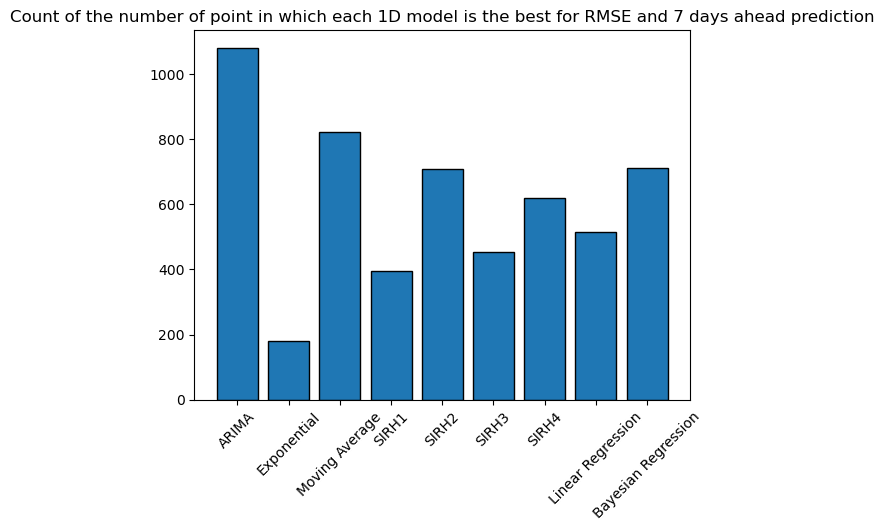

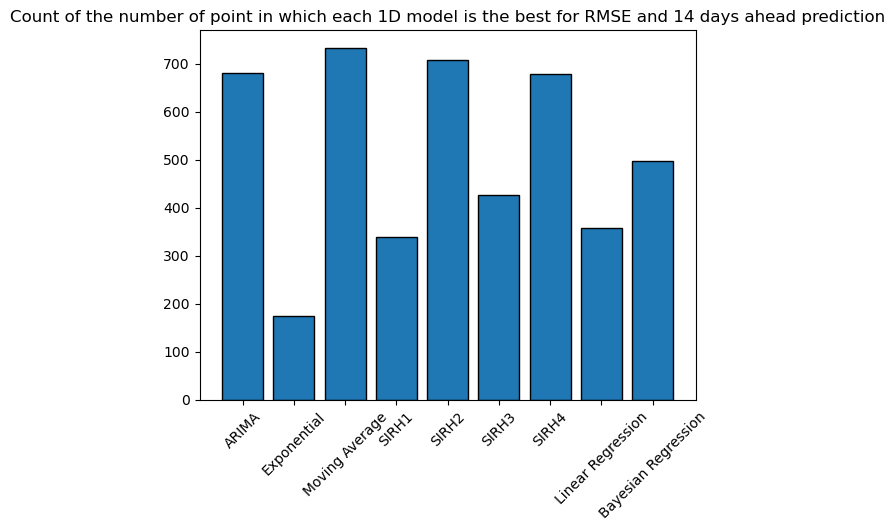

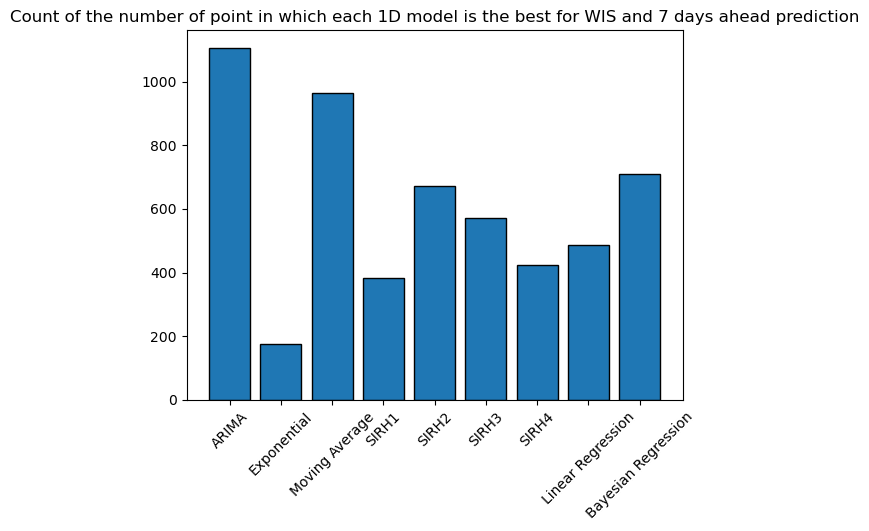

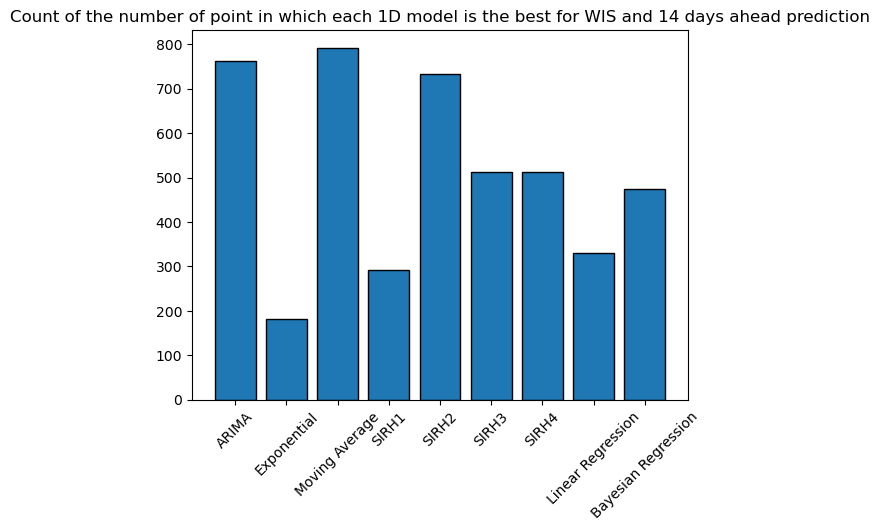

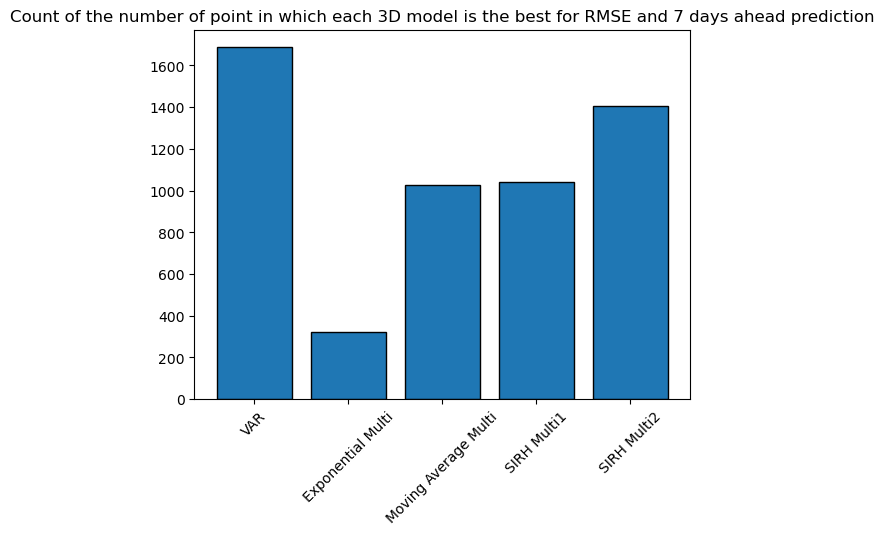

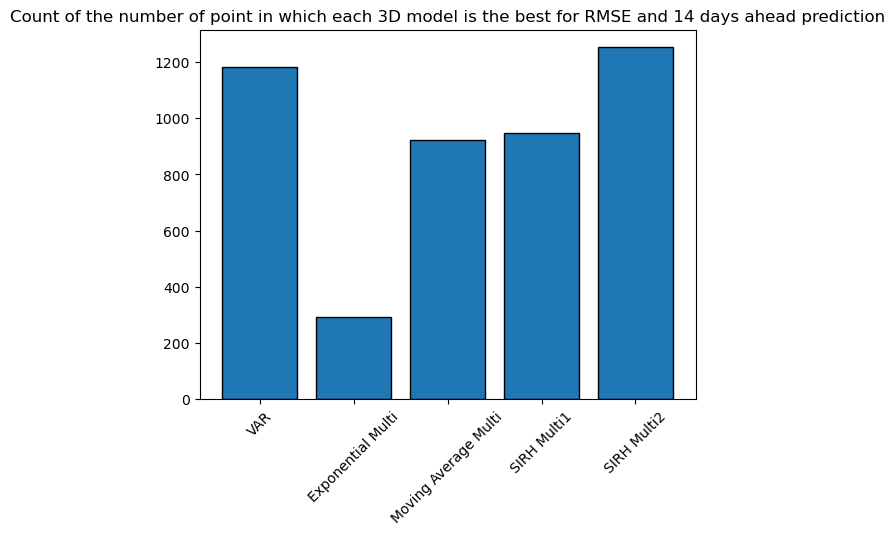

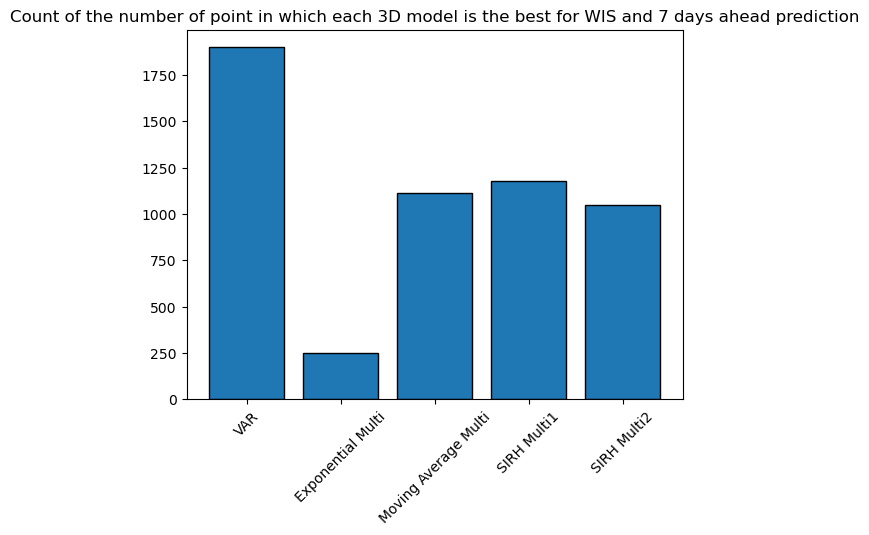

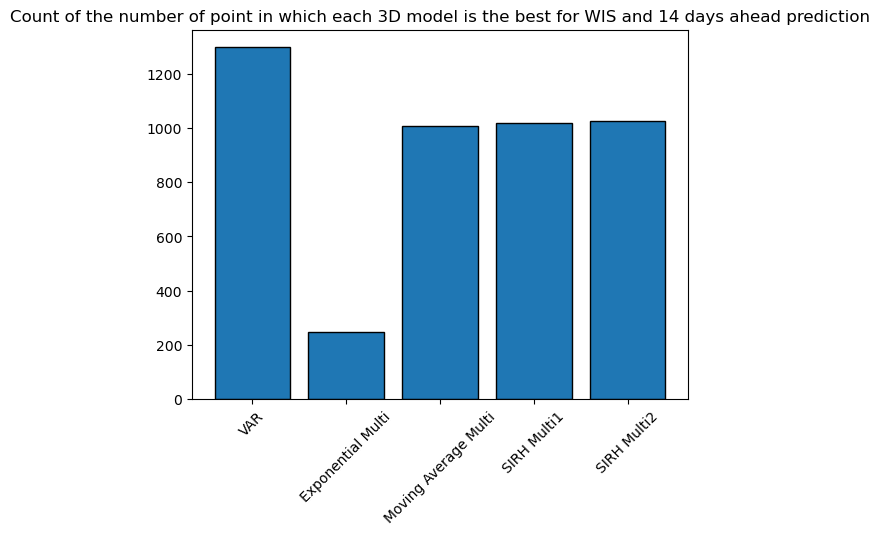

In [14]:

rmse_7_1D=[ name for name in os.listdir('./results/global_evaluation_from_zero/') if 'RMSE' in name and '7' in name and '1D' in name]

counts=[0 for i in range(len(models1Dnames))]


for name in rmse_7_1D: 
    dicoresults=json.load(open('./results/global_evaluation_from_zero/'+name))
    for point in dicoresults.keys(): 
        counts[np.argmin(dicoresults[point])]+=1

# histogramme des résultats 
plt.bar(models1Dnames, counts, edgecolor='black')
plt.xticks(rotation=45)
plt.title('Count of the number of point in which each 1D model is the best for RMSE and 7 days ahead prediction')
plt.show()


rmse_14_1D=[ name for name in os.listdir('./results/global_evaluation_from_zero/') if 'RMSE' in name and '14' in name and '1D' in name]

counts=[0 for i in range(len(models1Dnames))]


for name in rmse_14_1D: 
    dicoresults=json.load(open('./results/global_evaluation_from_zero/'+name))
    for point in dicoresults.keys(): 
        counts[np.argmin(dicoresults[point])]+=1

# histogramme des résultats 
plt.bar(models1Dnames, counts, edgecolor='black')
plt.xticks(rotation=45)
plt.title('Count of the number of point in which each 1D model is the best for RMSE and 14 days ahead prediction')
plt.show()


wis_7_1D=[ name for name in os.listdir('./results/global_evaluation_from_zero/') if 'WIS' in name and '7' in name and '1D' in name]
counts=[0 for i in range(len(models1Dnames))]
for name in wis_7_1D: 
    dicoresults=json.load(open('./results/global_evaluation_from_zero/'+name))
    for point in dicoresults.keys(): 
        counts[np.argmin(dicoresults[point])]+=1


plt.bar(models1Dnames, counts, edgecolor='black')
plt.xticks(rotation=45)
plt.title('Count of the number of point in which each 1D model is the best for WIS and 7 days ahead prediction')
plt.show()

wis_14_1D=[ name for name in os.listdir('./results/global_evaluation_from_zero/') if 'WIS' in name and '14' in name and '1D' in name]
counts=[0 for i in range(len(models1Dnames))]
for name in wis_14_1D: 
    dicoresults=json.load(open('./results/global_evaluation_from_zero/'+name))
    for point in dicoresults.keys(): 
        counts[np.argmin(dicoresults[point])]+=1


plt.bar(models1Dnames, counts, edgecolor='black')
plt.xticks(rotation=45)
plt.title('Count of the number of point in which each 1D model is the best for WIS and 14 days ahead prediction')
plt.show()



rmse_7_3D=[ name for name in os.listdir('./results/global_evaluation_from_zero/') if 'RMSE' in name and '7' in name and '3D' in name]
counts=[0 for i in range(len(models3Dnames))]
for name in rmse_7_3D: 
    dicoresults=json.load(open('./results/global_evaluation_from_zero/'+name))
    for point in dicoresults.keys(): 
        counts[np.argmin(dicoresults[point])]+=1

plt.bar(models3Dnames, counts, edgecolor='black')
plt.xticks(rotation=45)
plt.title('Count of the number of point in which each 3D model is the best for RMSE and 7 days ahead prediction')
plt.show()


rmse_14_3D=[ name for name in os.listdir('./results/global_evaluation_from_zero/') if 'RMSE' in name and '14' in name and '3D' in name]
counts=[0 for i in range(len(models3Dnames))]
for name in rmse_14_3D: 
    dicoresults=json.load(open('./results/global_evaluation_from_zero/'+name))
    for point in dicoresults.keys(): 
        counts[np.argmin(dicoresults[point])]+=1

plt.bar(models3Dnames, counts, edgecolor='black')
plt.xticks(rotation=45)
plt.title('Count of the number of point in which each 3D model is the best for RMSE and 14 days ahead prediction')
plt.show()


wis_7_3D=[ name for name in os.listdir('./results/global_evaluation_from_zero/') if 'WIS' in name and '7' in name and '3D' in name]
counts=[0 for i in range(len(models3Dnames))]
for name in wis_7_3D: 
    dicoresults=json.load(open('./results/global_evaluation_from_zero/'+name))
    for point in dicoresults.keys(): 
        counts[np.argmin(dicoresults[point])]+=1

plt.bar(models3Dnames, counts, edgecolor='black')
plt.xticks(rotation=45)
plt.title('Count of the number of point in which each 3D model is the best for WIS and 7 days ahead prediction')
plt.show()


wis_14_3D=[ name for name in os.listdir('./results/global_evaluation_from_zero/') if 'WIS' in name and '14' in name and '3D' in name]
counts=[0 for i in range(len(models3Dnames))]
for name in wis_14_3D: 
    dicoresults=json.load(open('./results/global_evaluation_from_zero/'+name))
    for point in dicoresults.keys(): 
        counts[np.argmin(dicoresults[point])]+=1

plt.bar(models3Dnames, counts, edgecolor='black')
plt.xticks(rotation=45)
plt.title('Count of the number of point in which each 3D model is the best for WIS and 14 days ahead prediction')
plt.show()


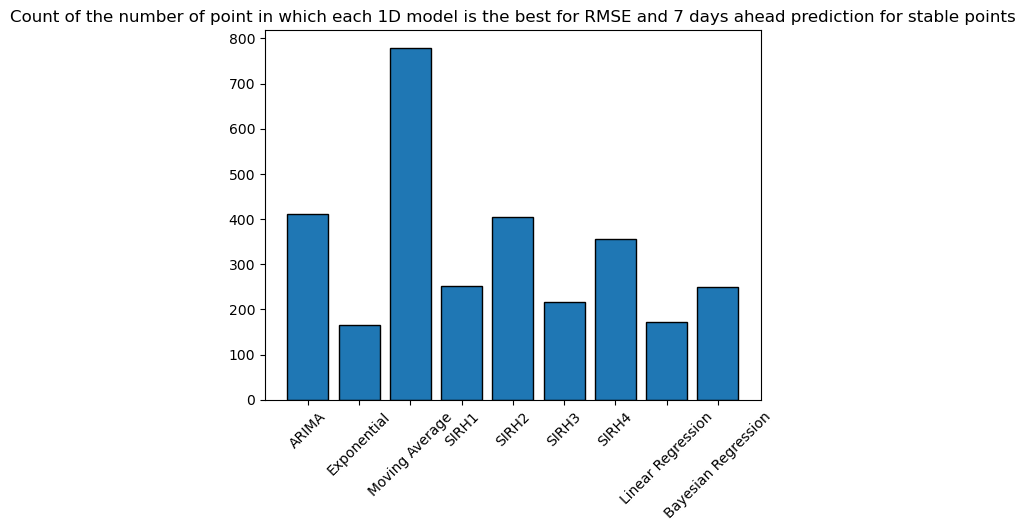

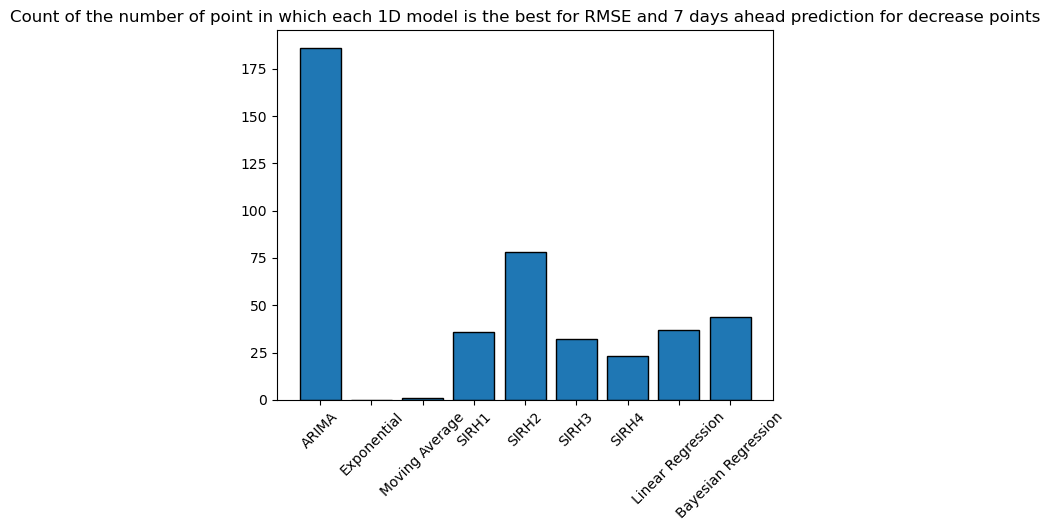

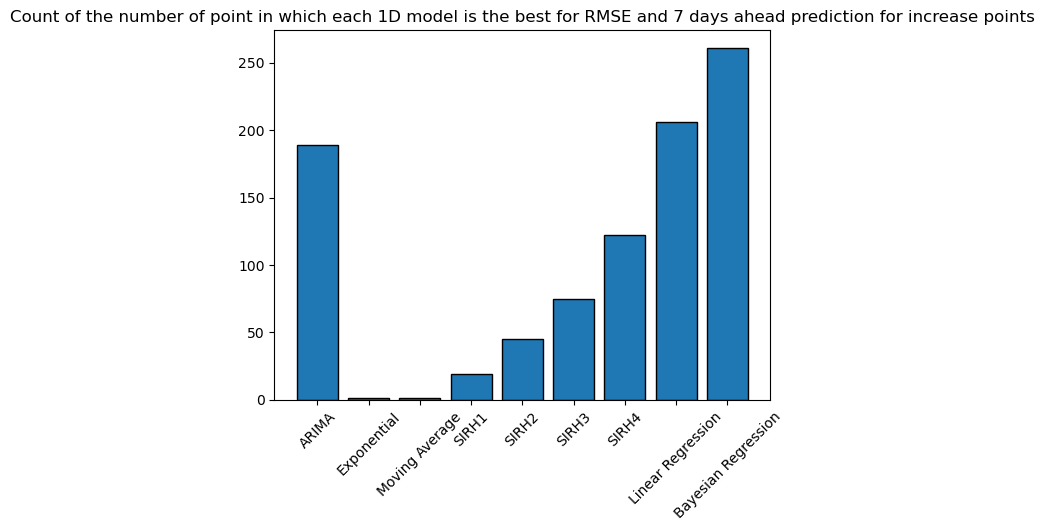

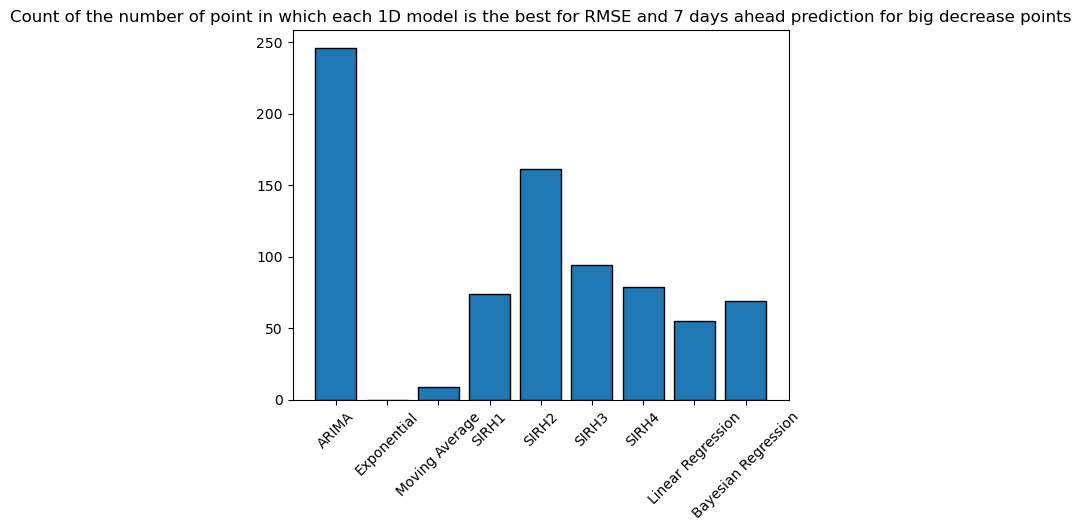

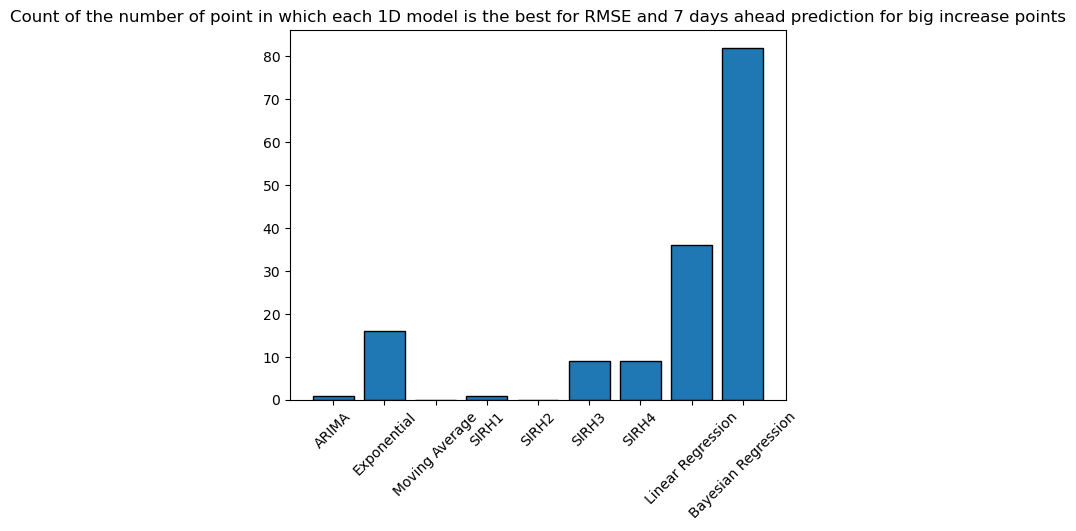

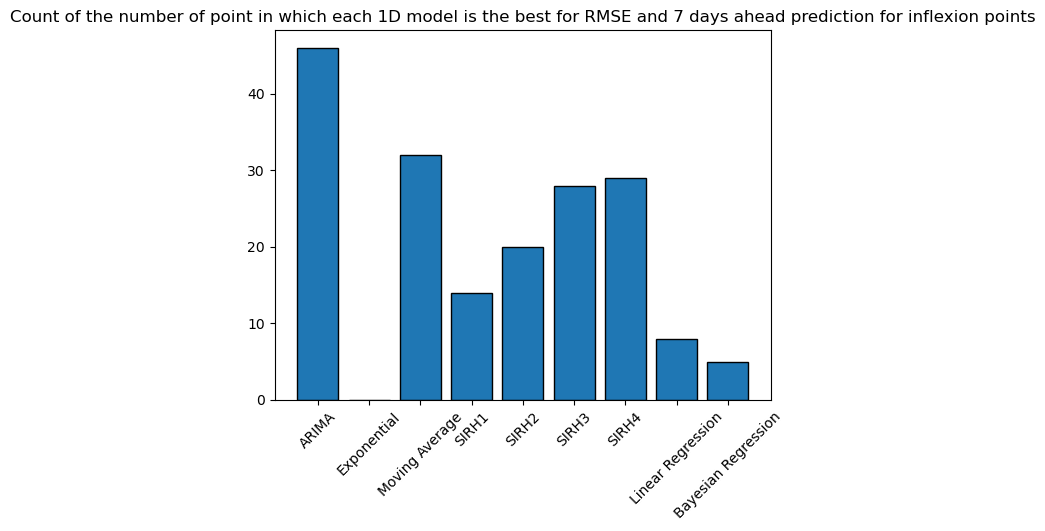

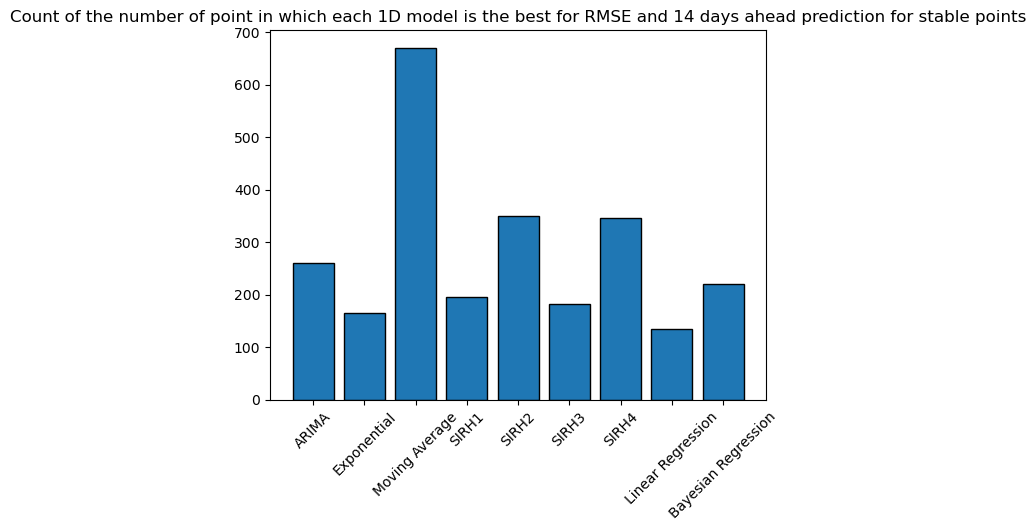

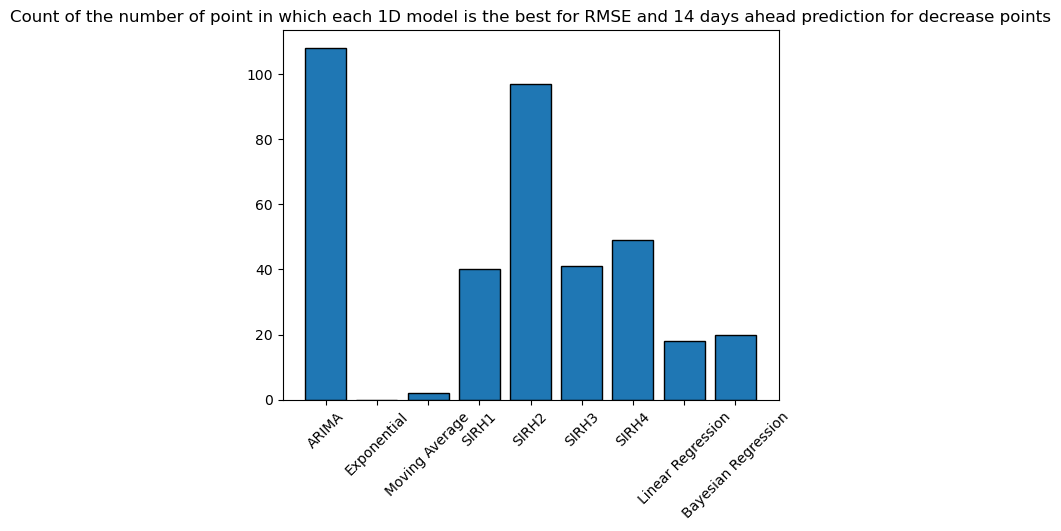

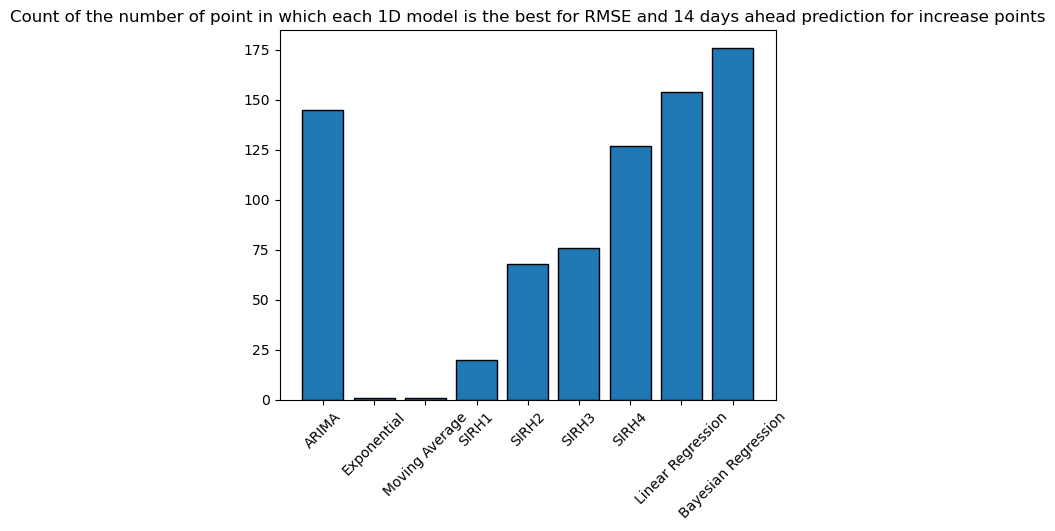

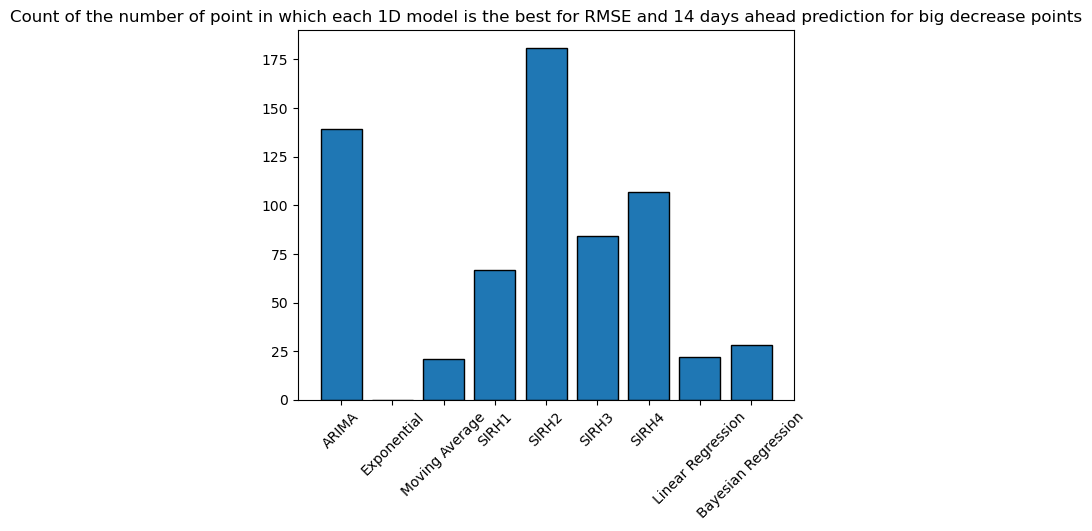

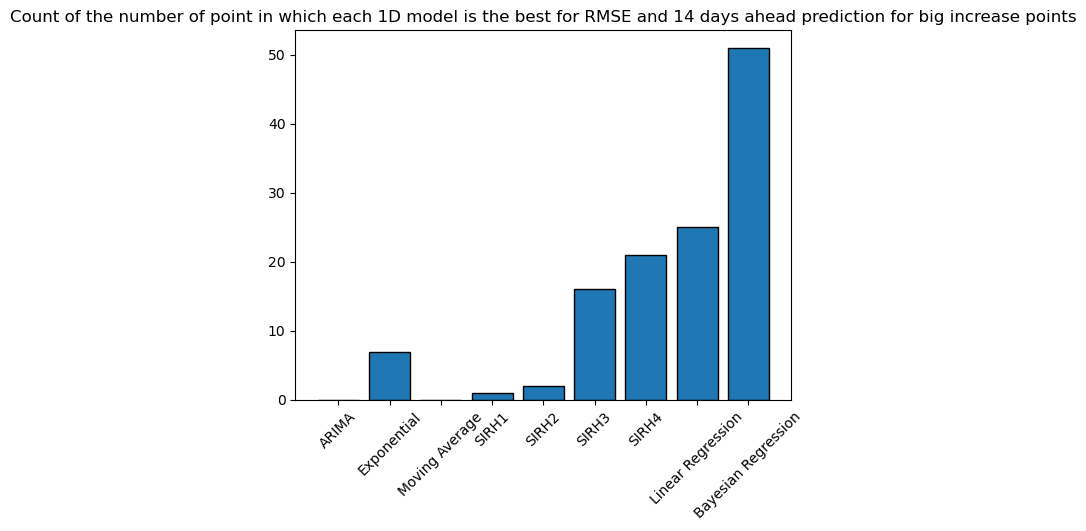

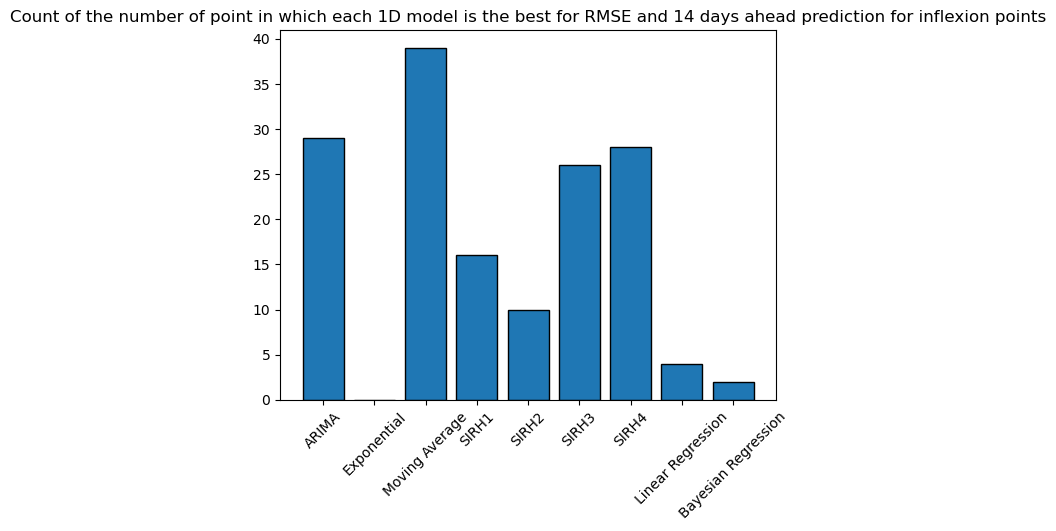

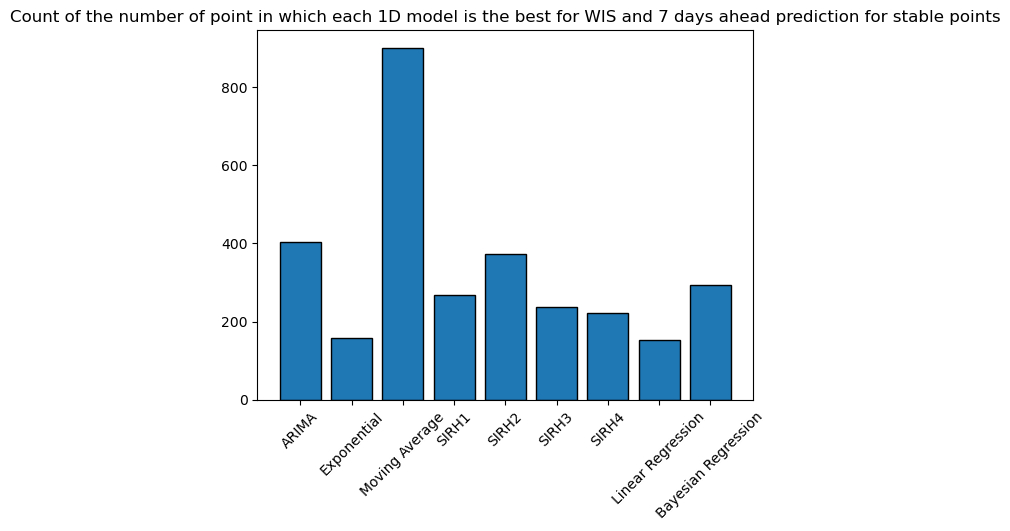

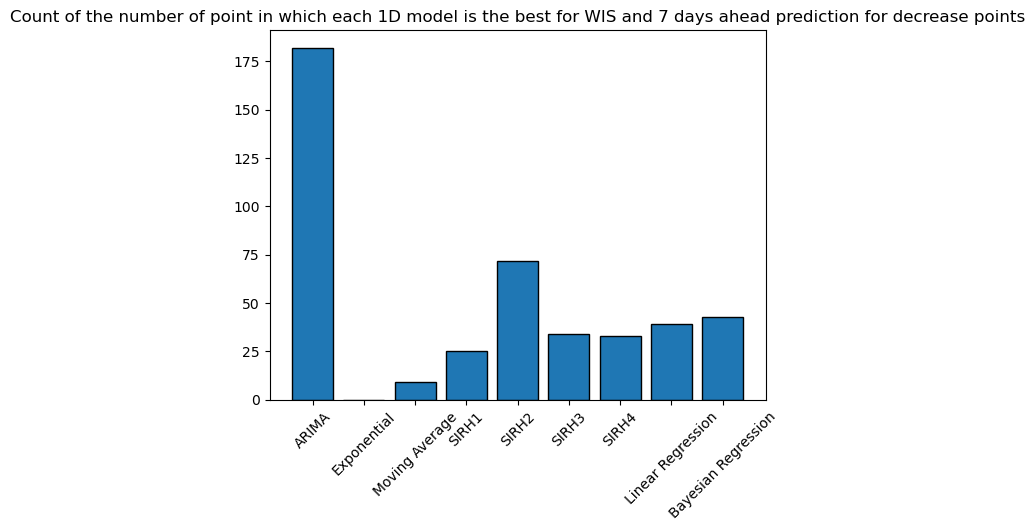

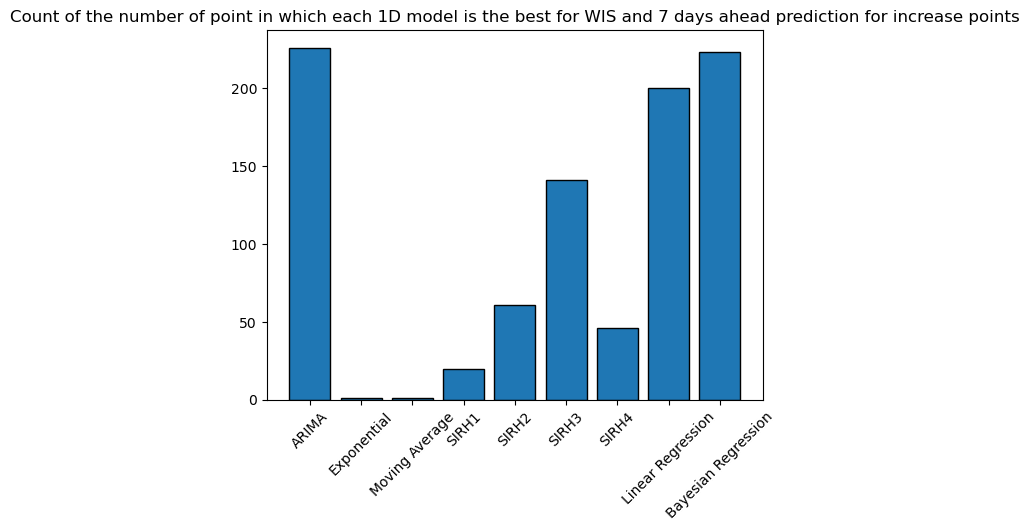

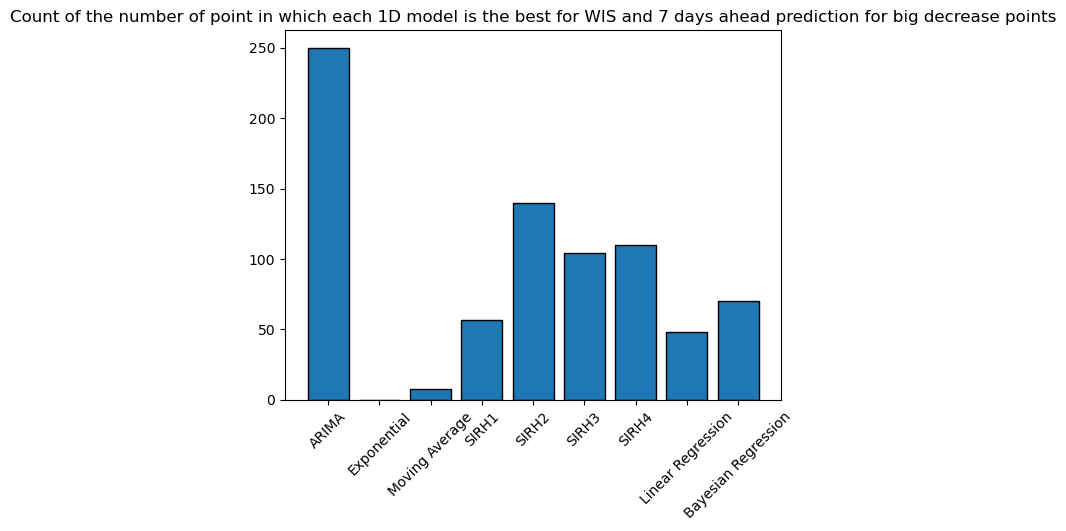

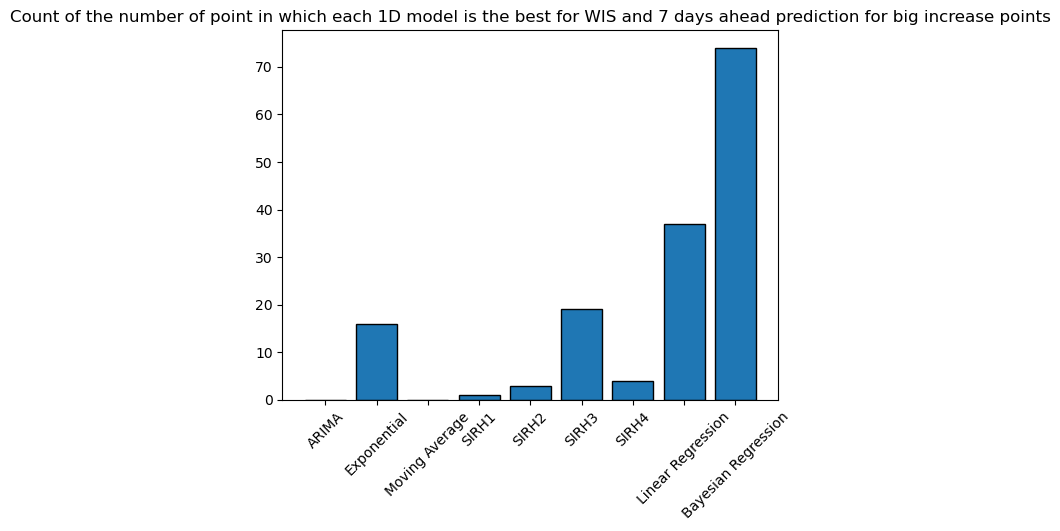

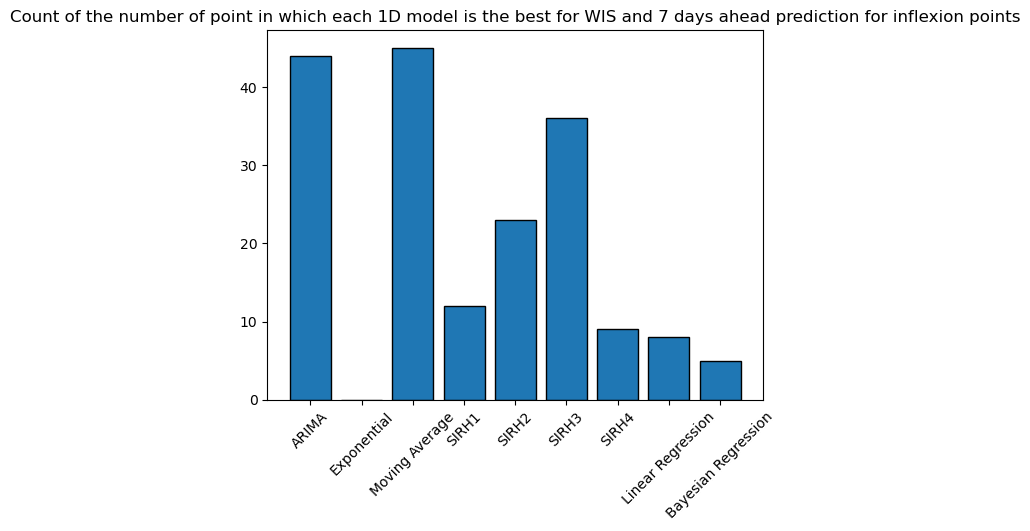

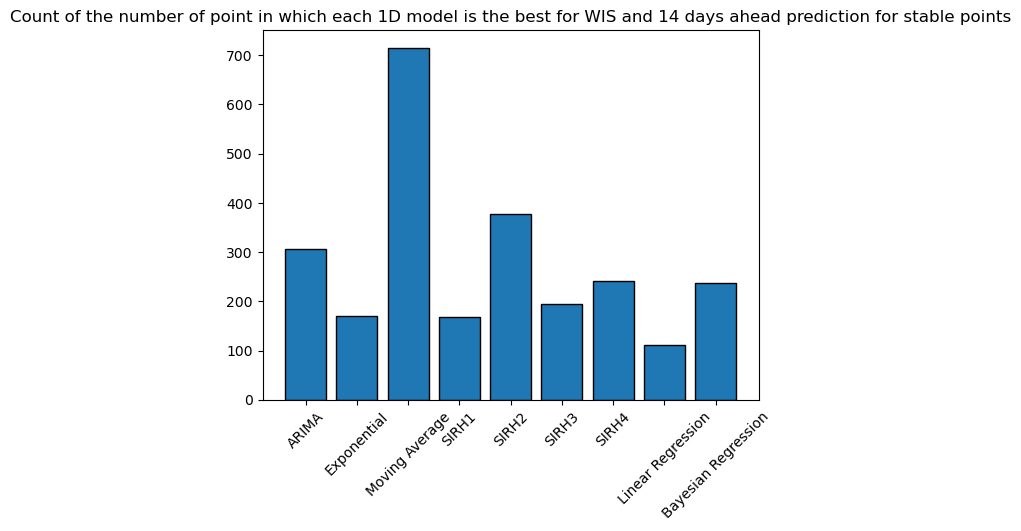

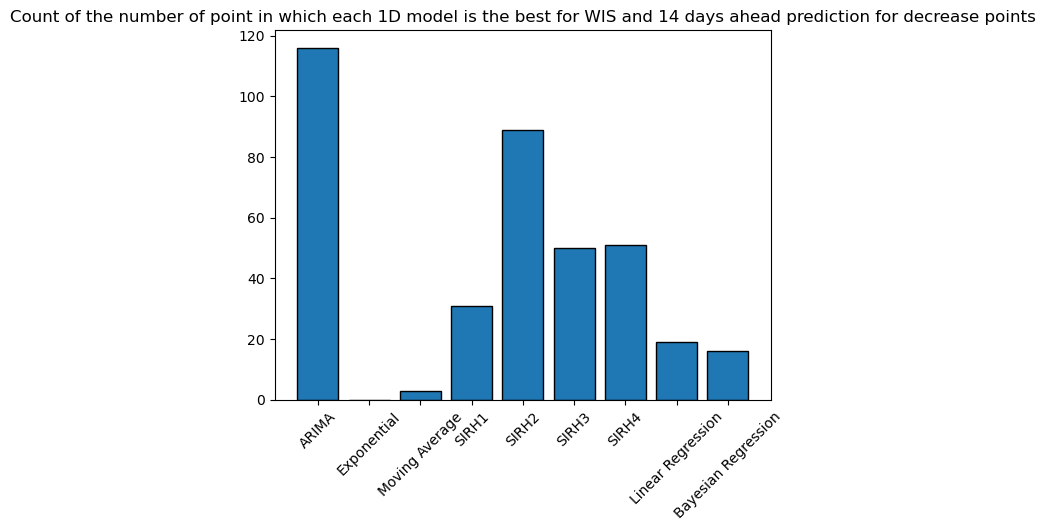

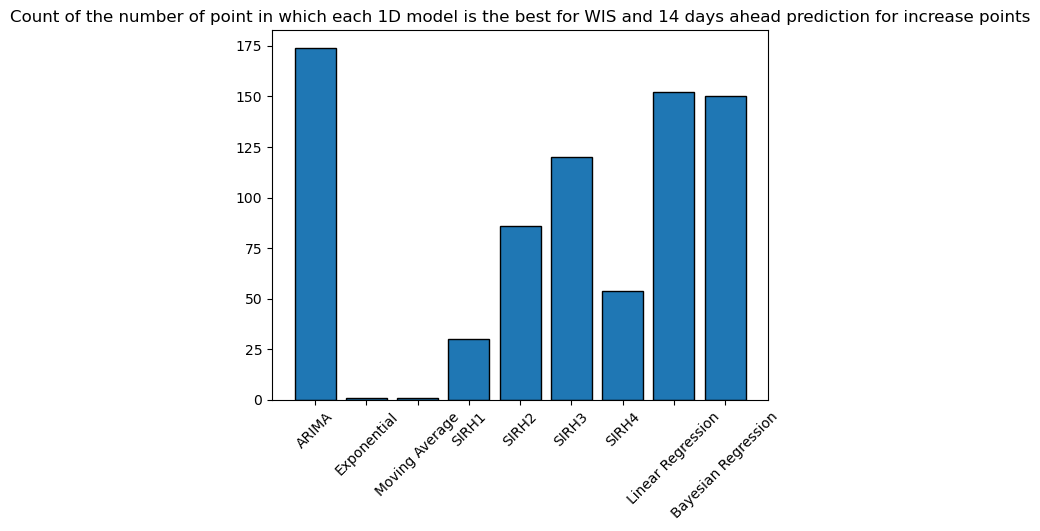

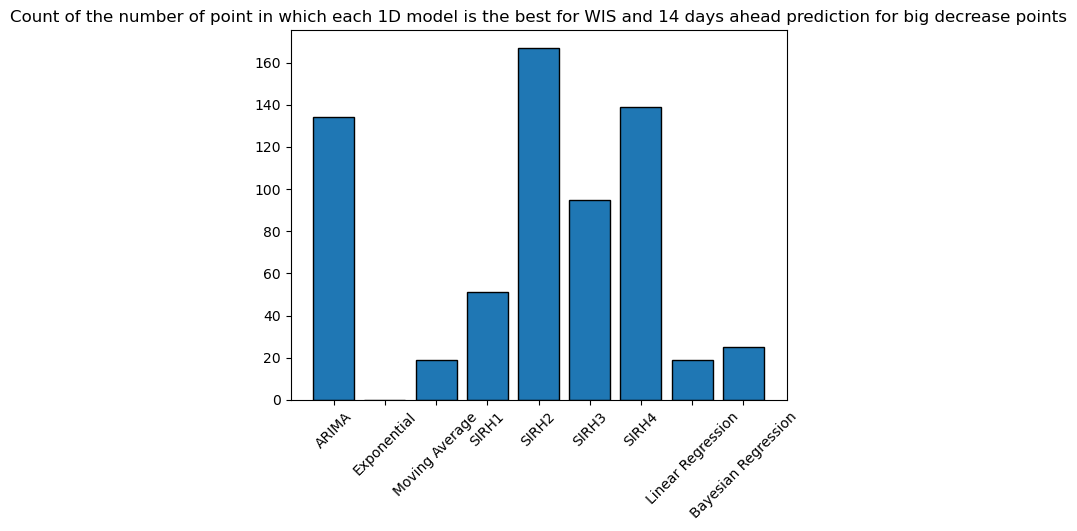

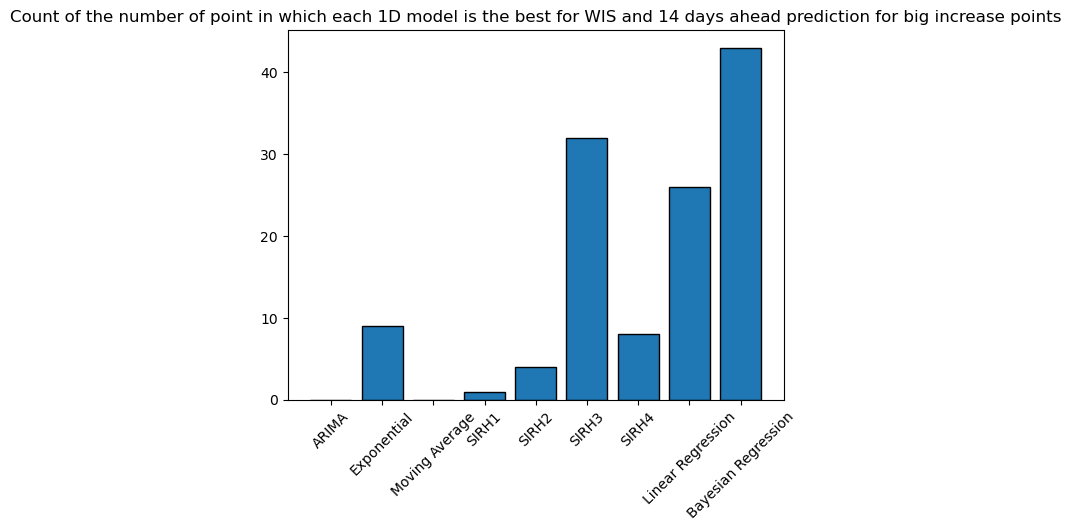

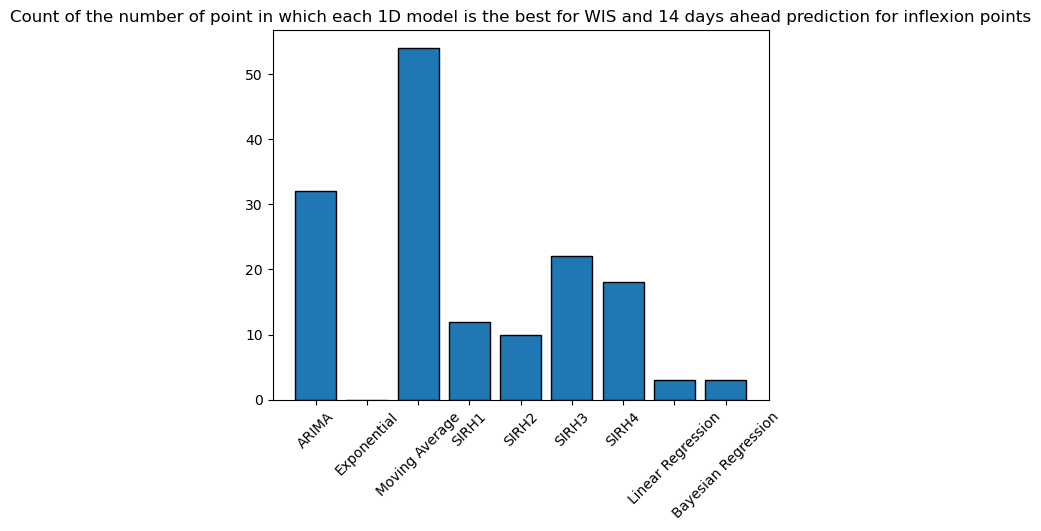

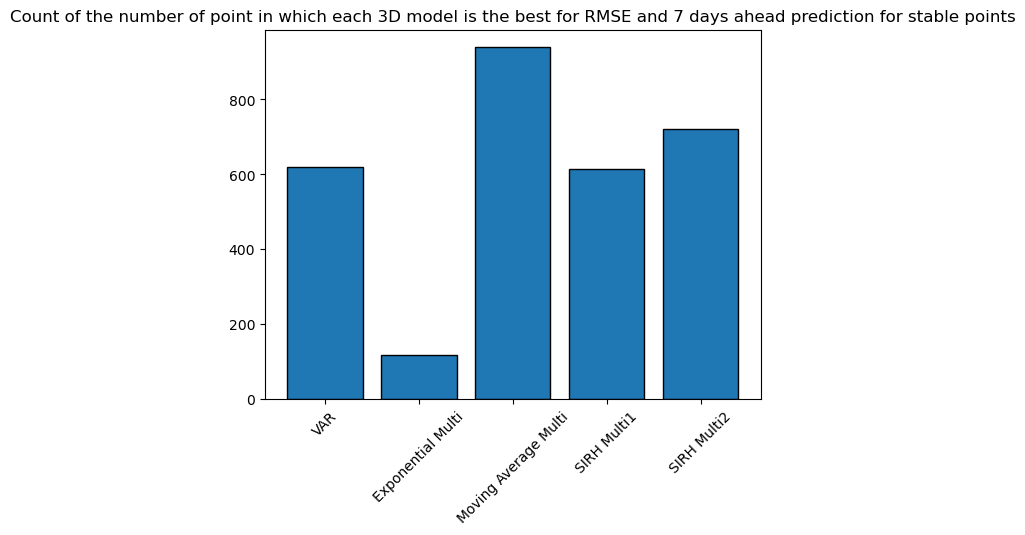

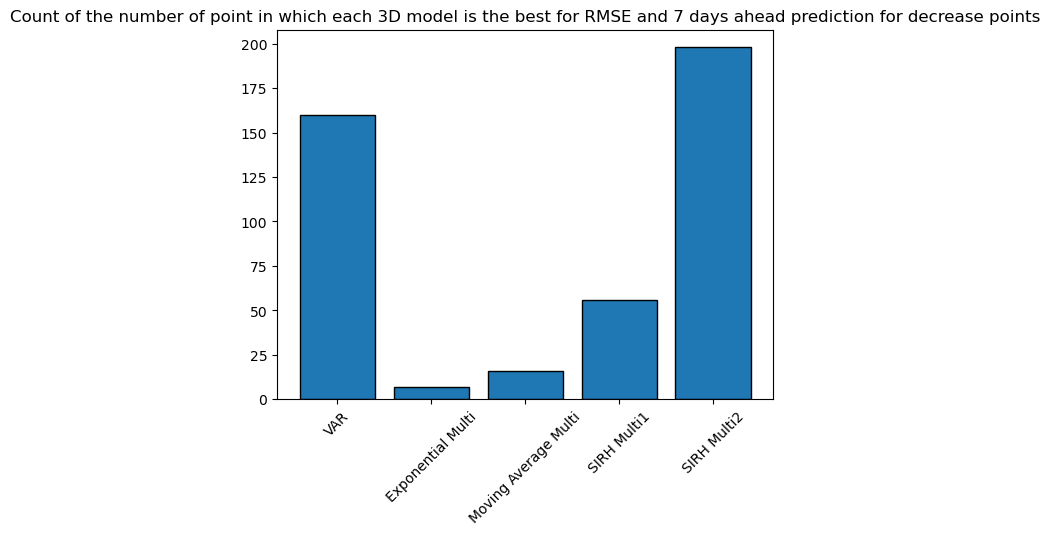

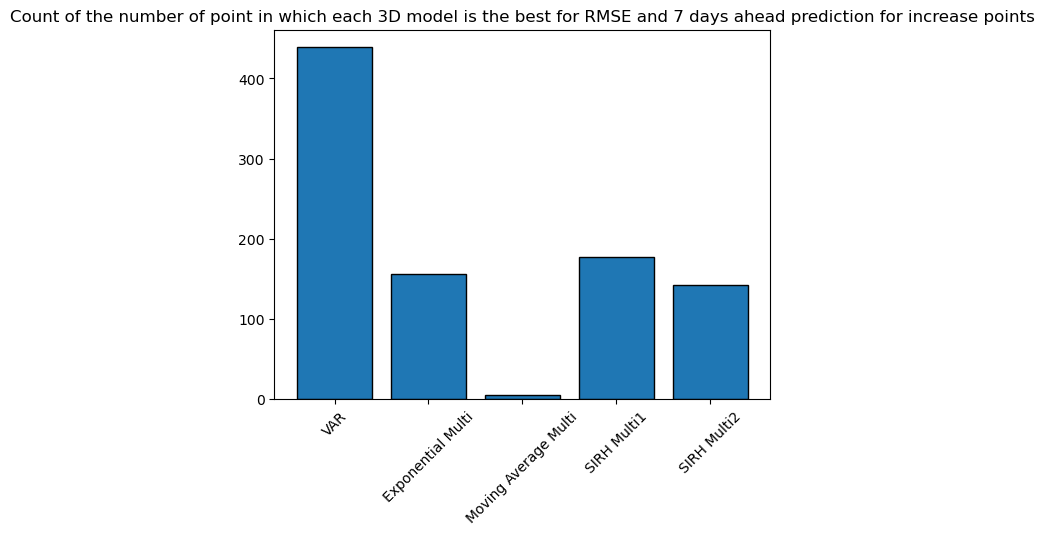

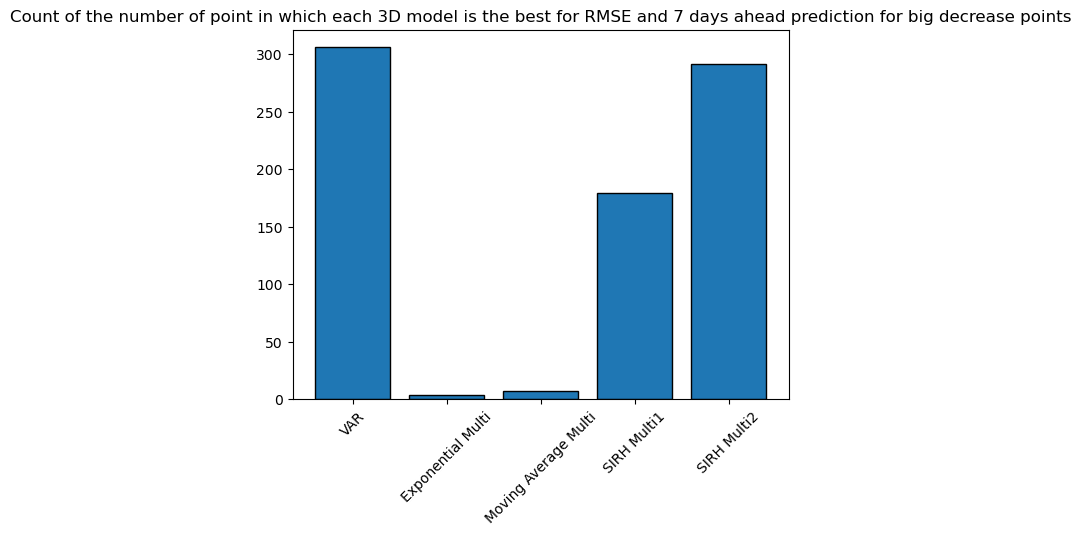

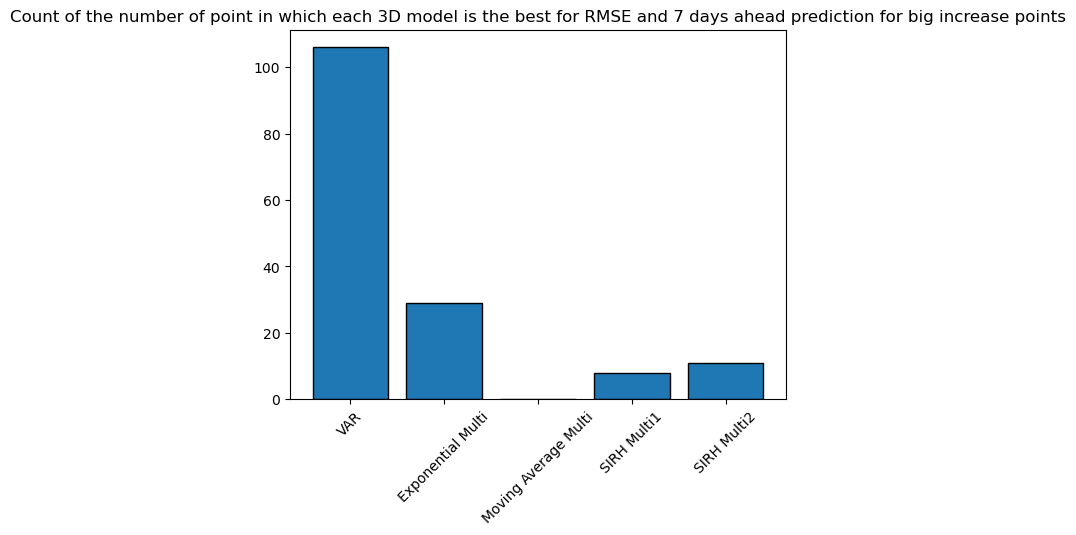

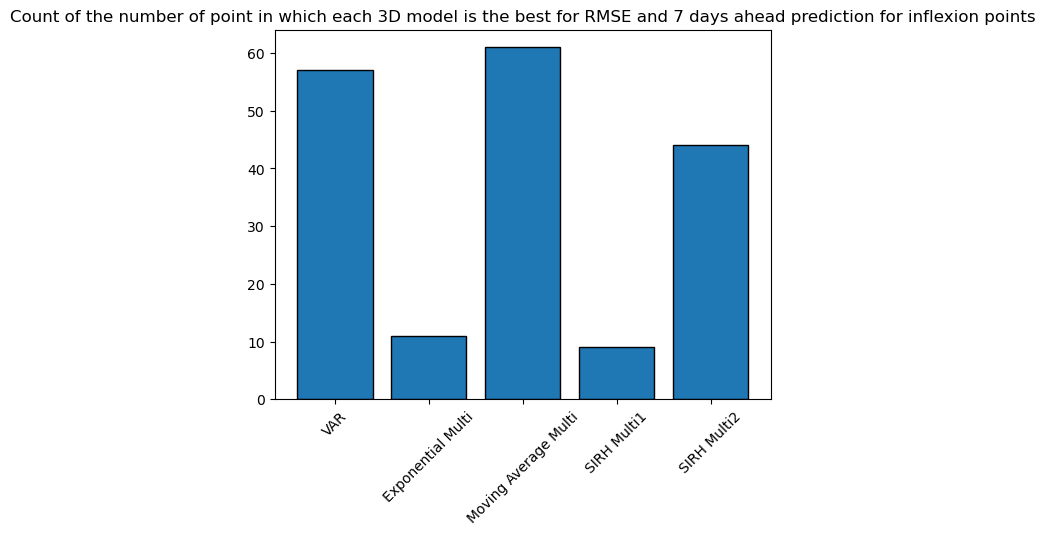

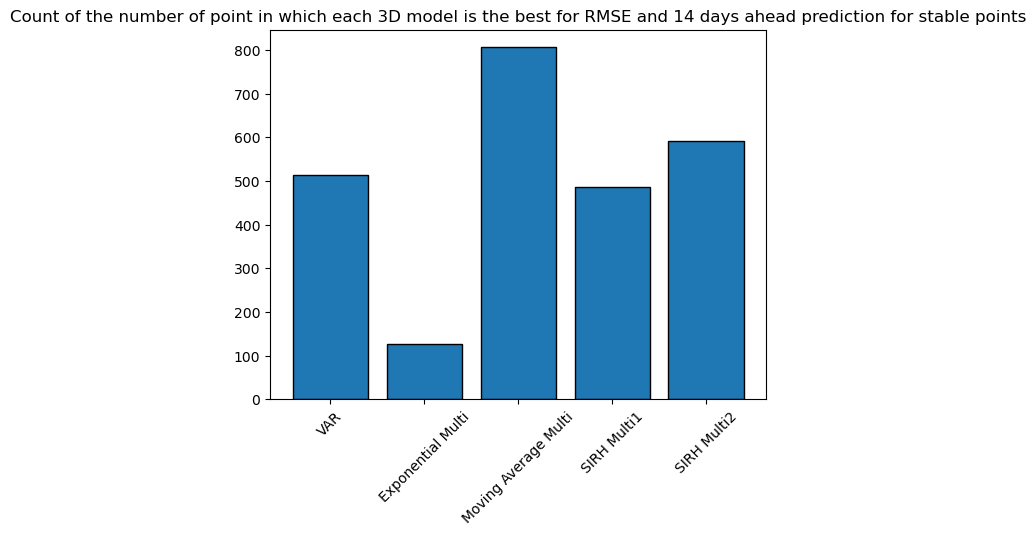

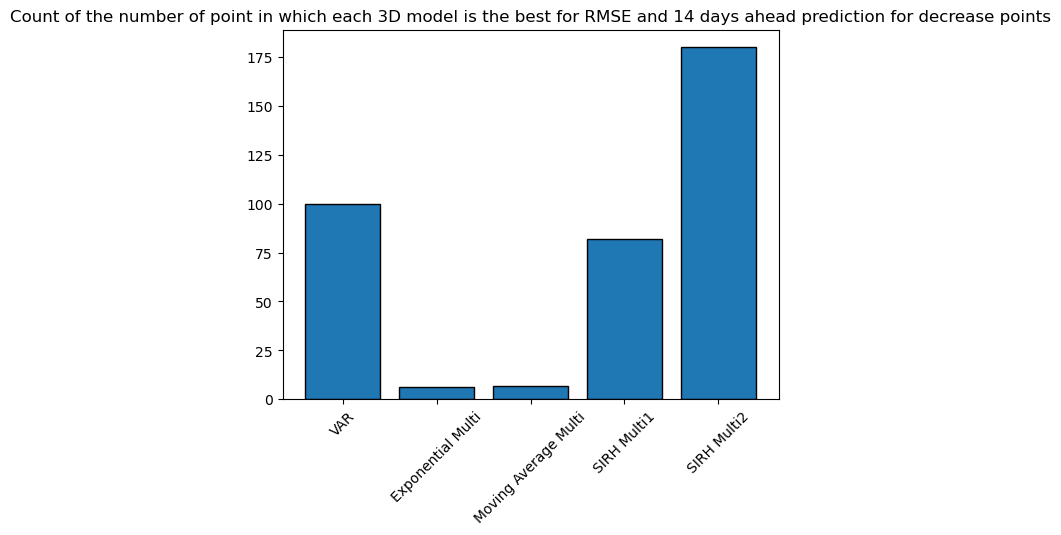

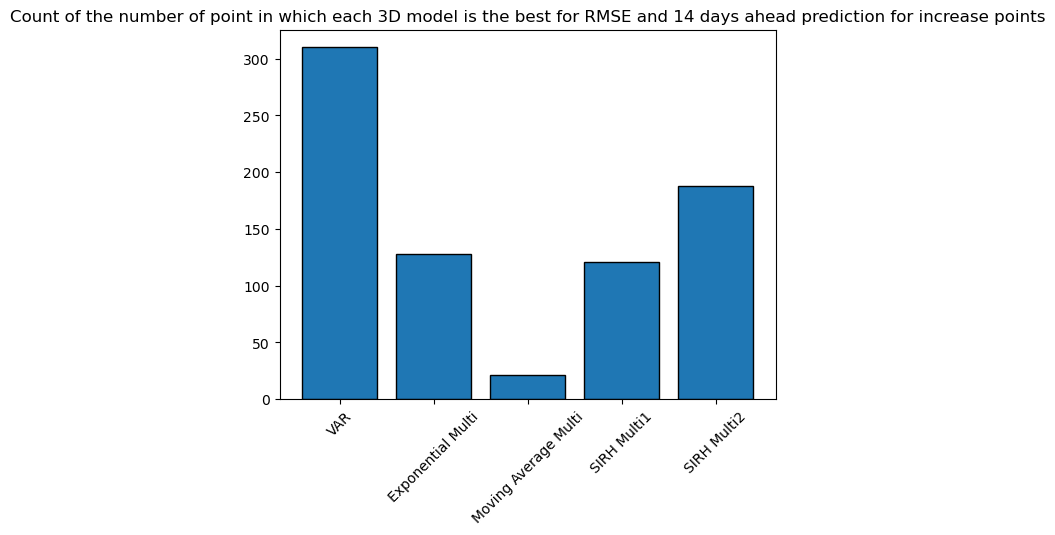

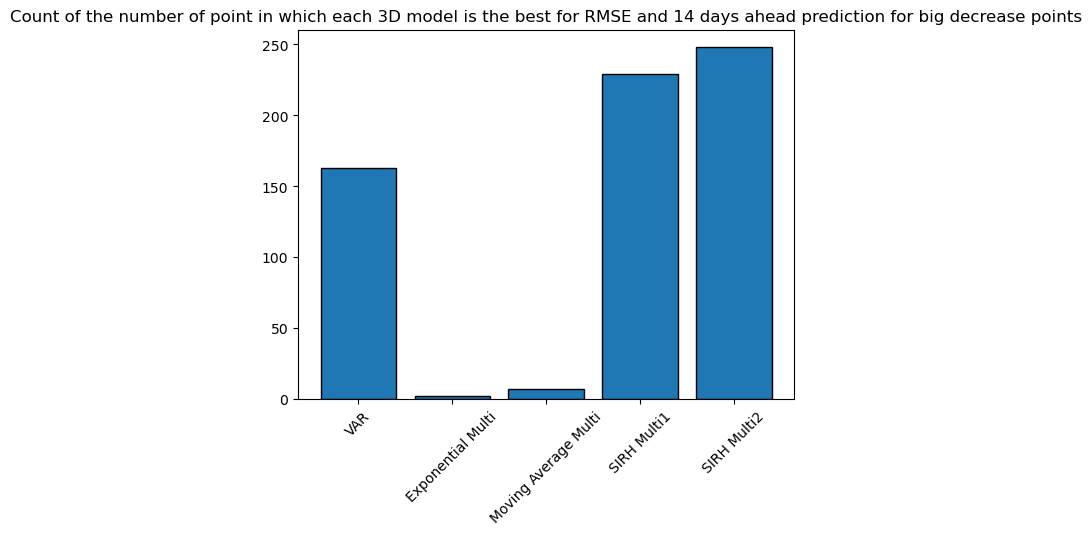

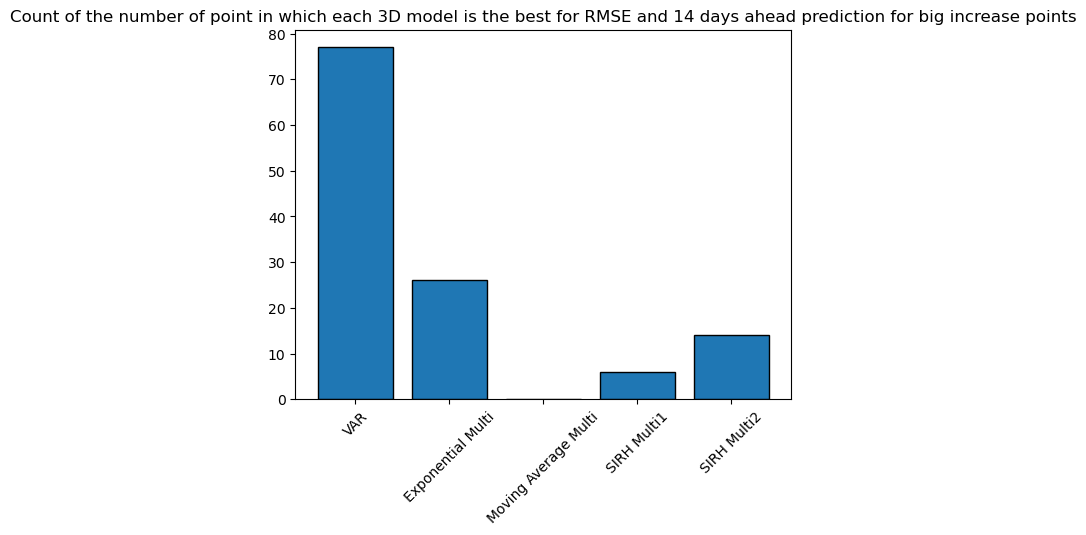

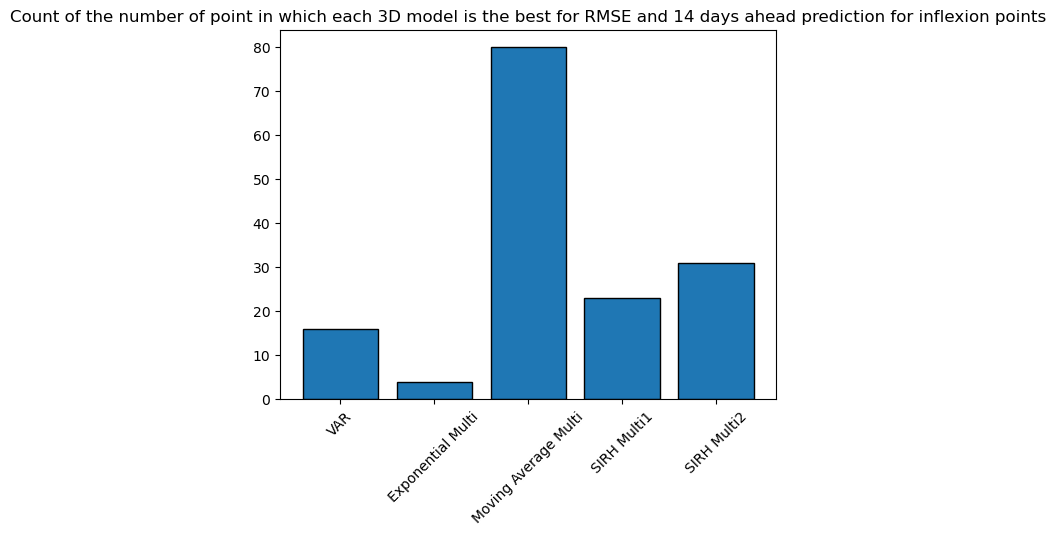

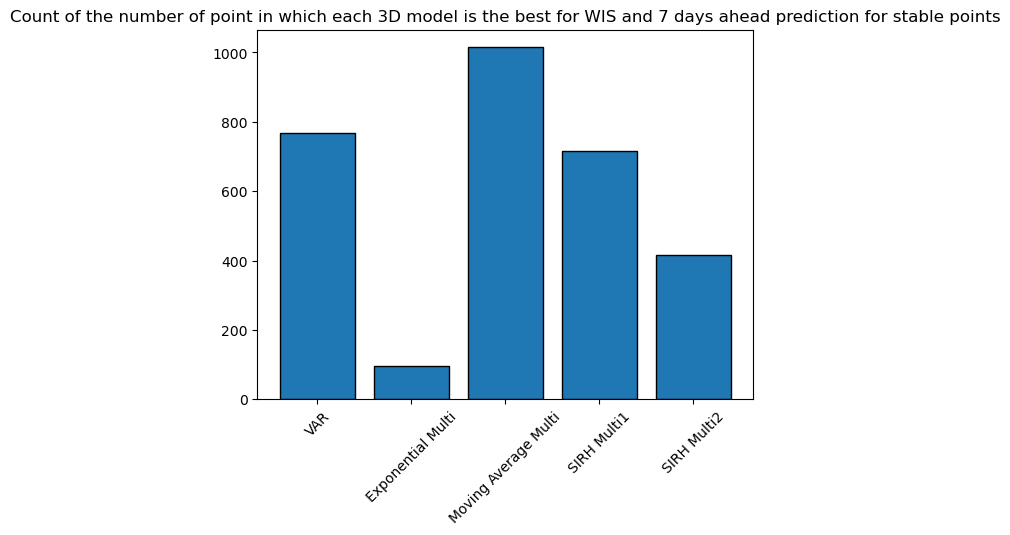

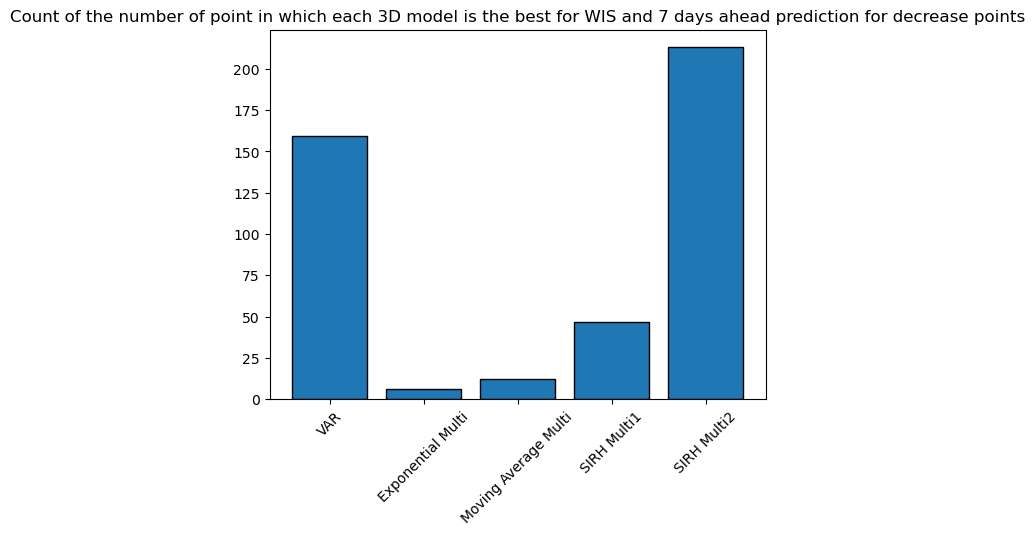

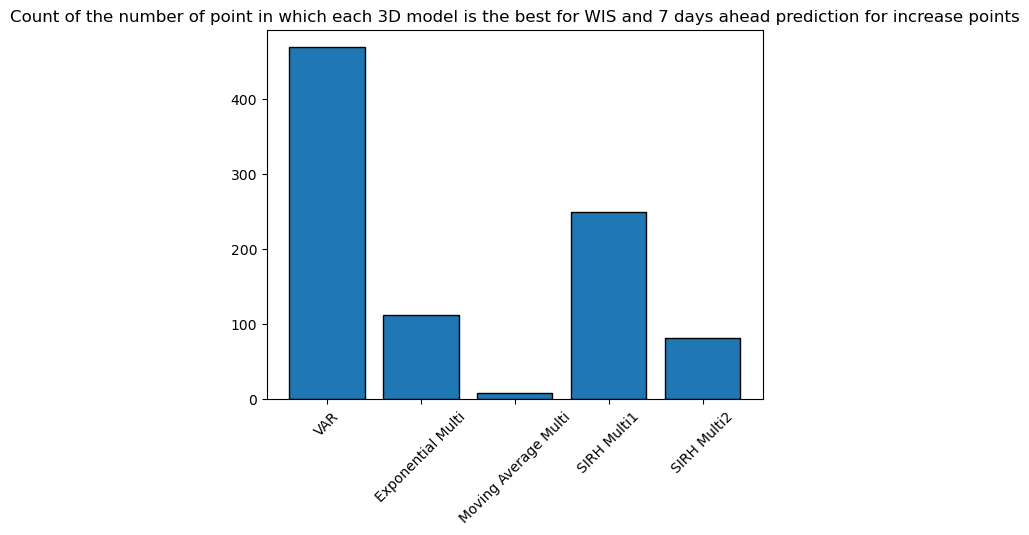

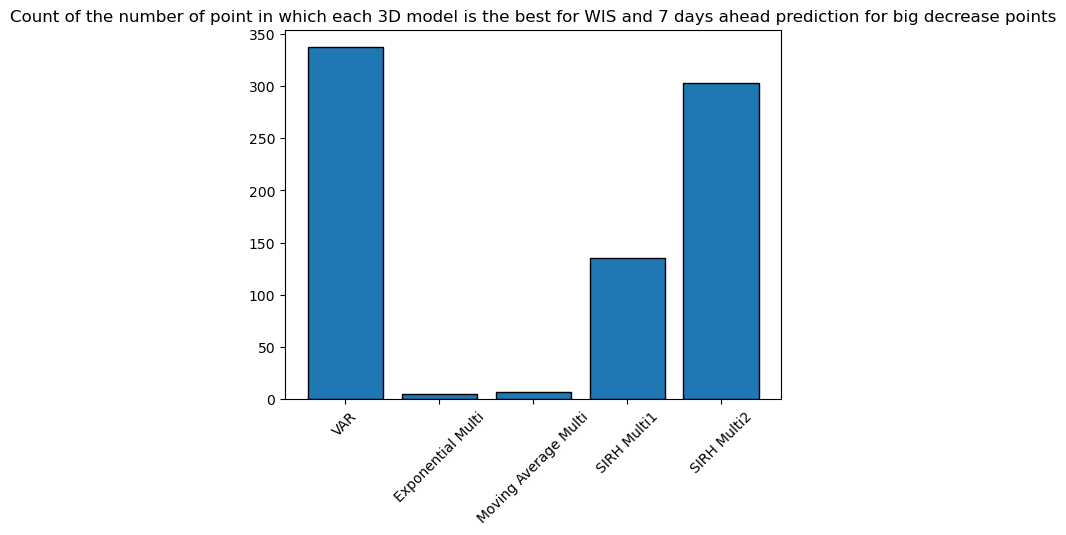

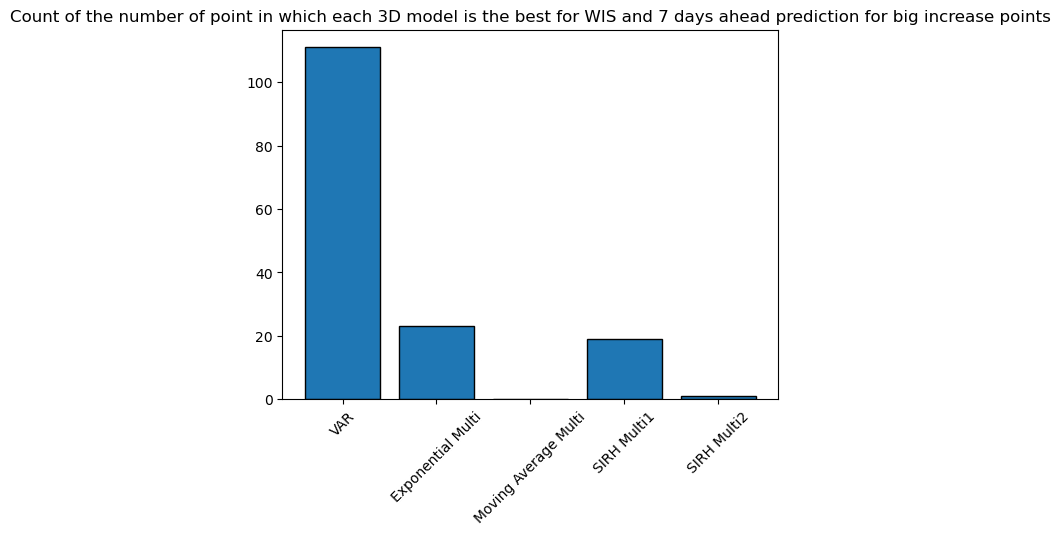

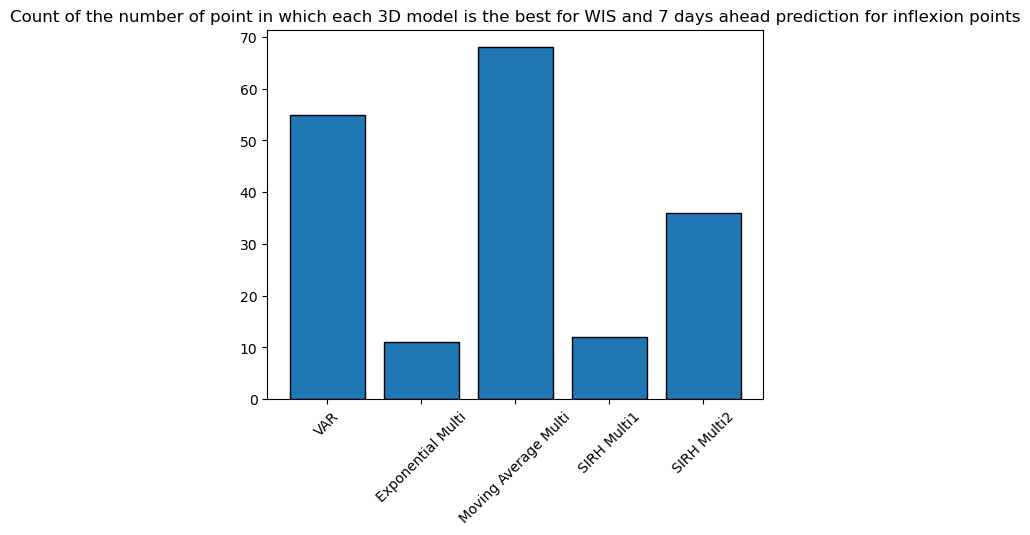

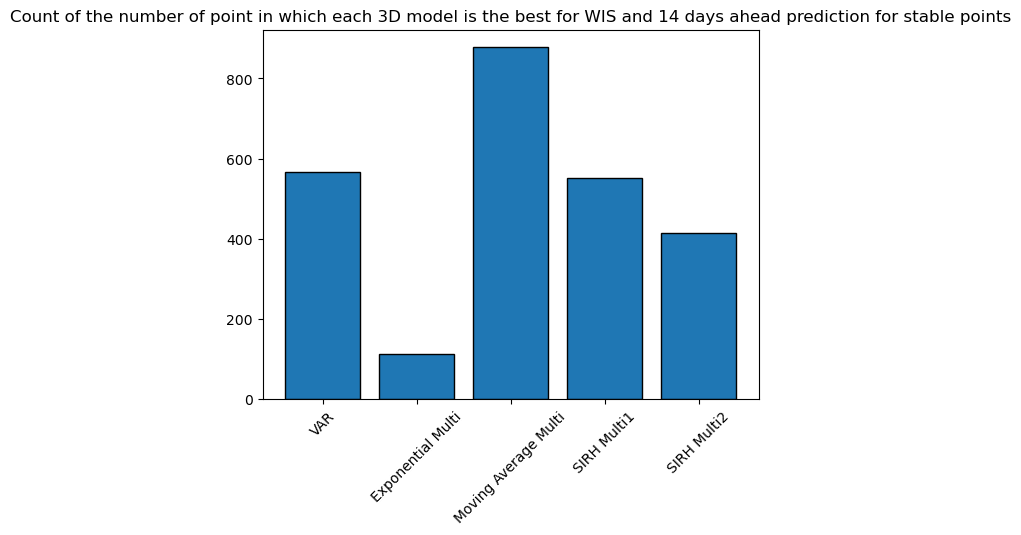

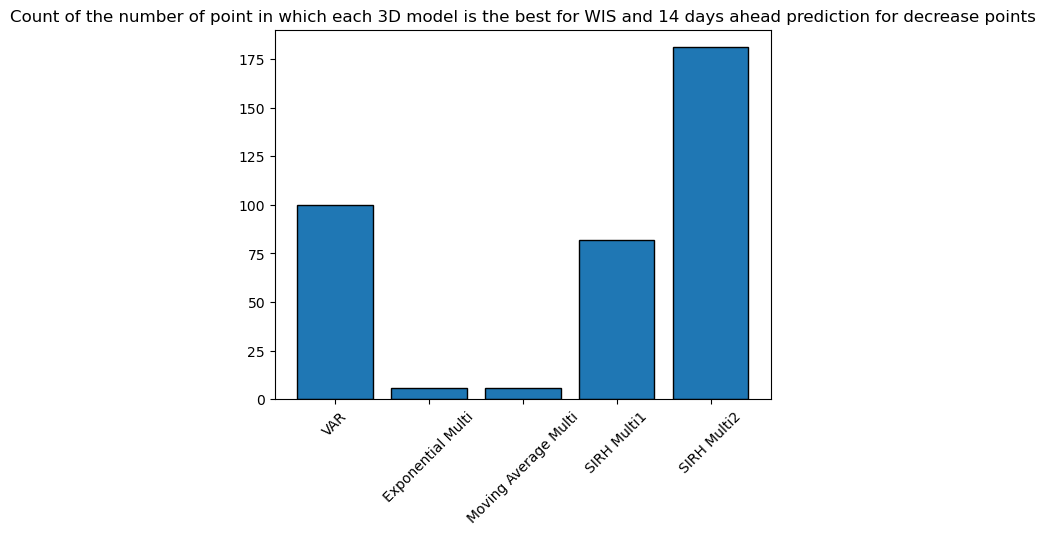

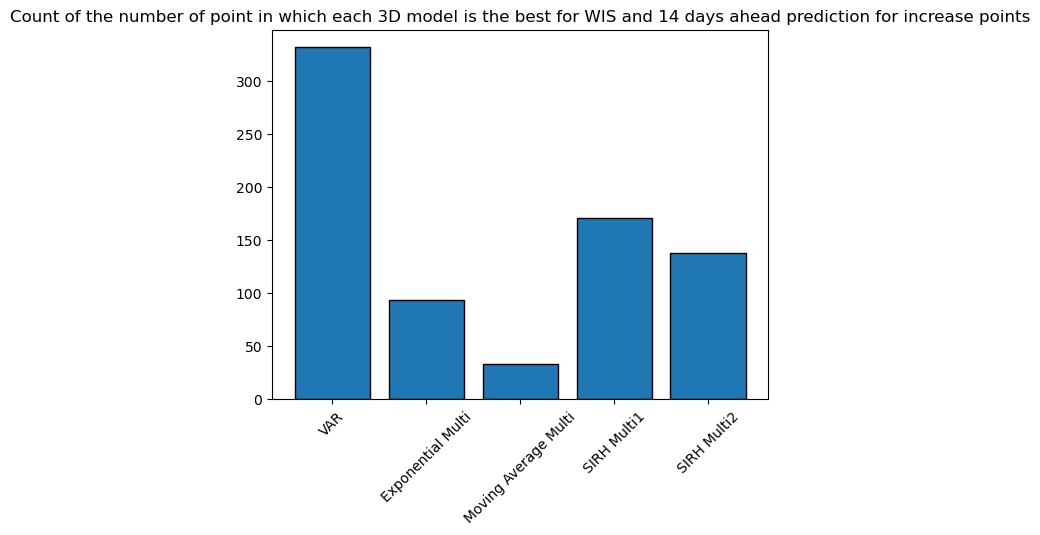

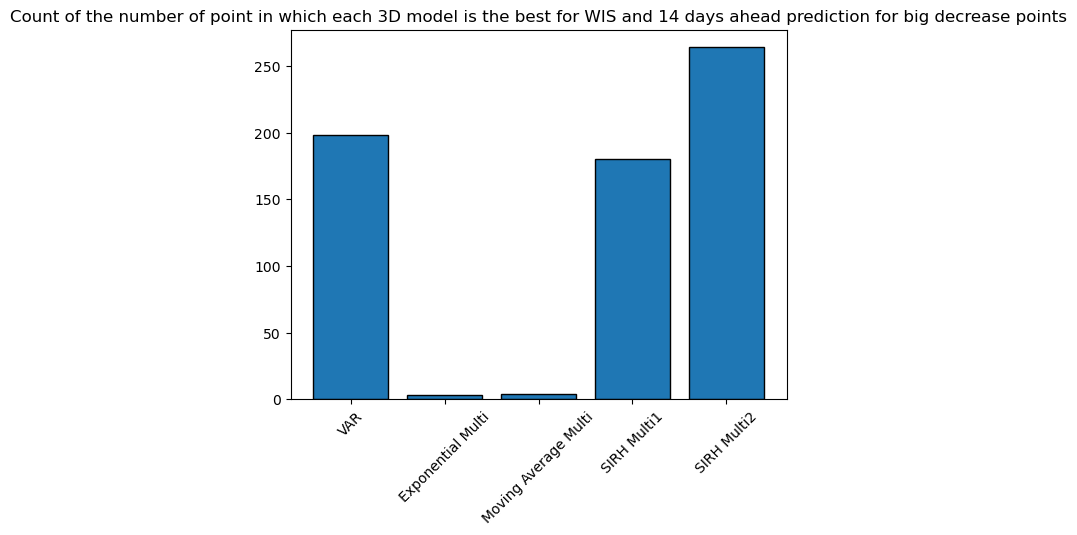

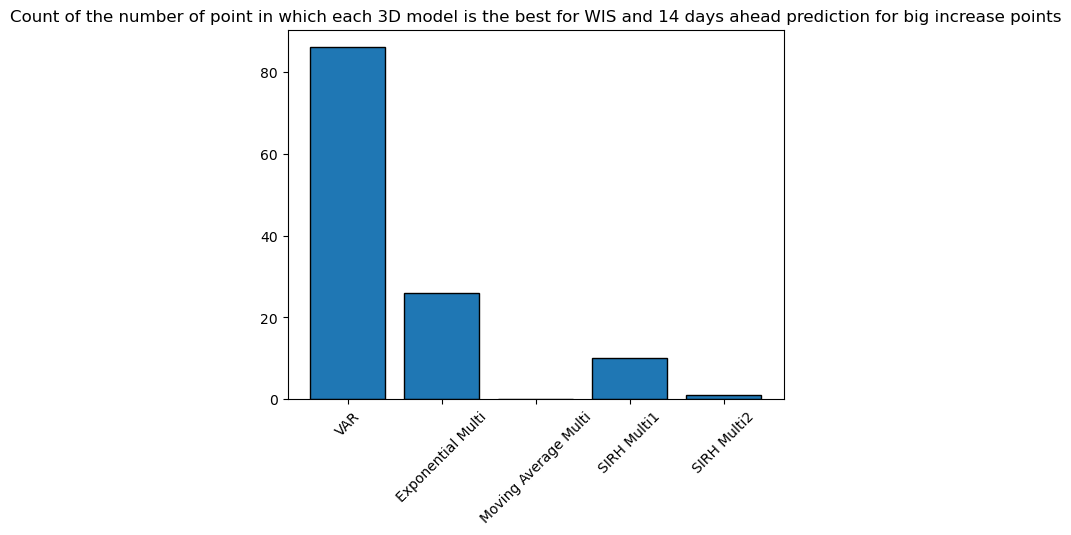

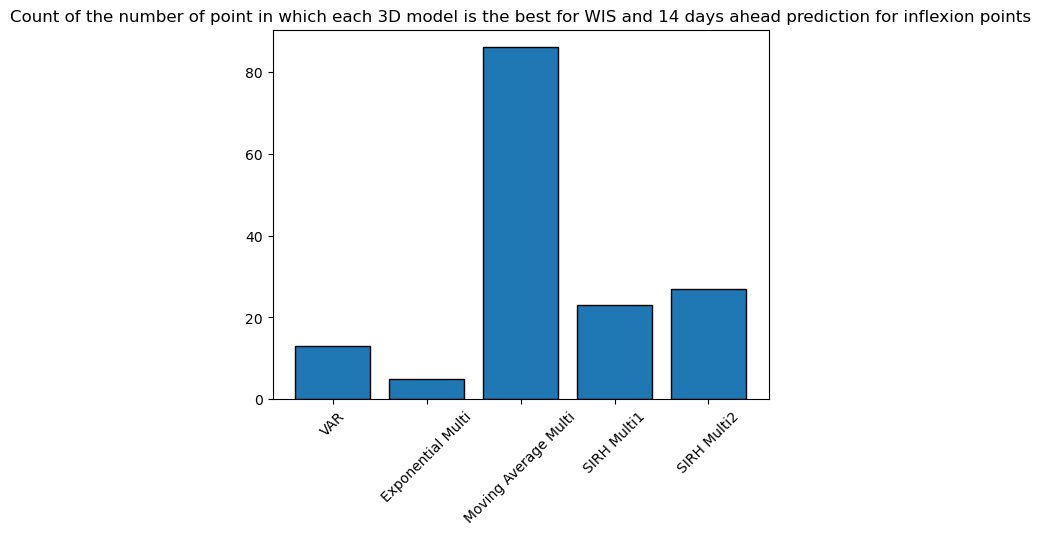

In [26]:
for model_type in ['1D', '3D']:
    for loss in ['RMSE', 'WIS'] :
        for reach in ['7', '14']: 
            for label_point in ['stable', 'decrease', 'increase', 'big decrease', 'big increase', 'inflexion']:
                if model_type == '3D':
                    list_of_models=models3Dnames
                else:
                    list_of_models=models1Dnames
                counts=[0 for i in range(len(list_of_models))]
                results_list=[ name for name in os.listdir('./results/global_evaluation_from_zero/') if loss in name and reach in name and model_type in name]
                for name in results_list : 
                    dicoresults=json.load(open('./results/global_evaluation_from_zero/'+name))
                    df=pd.read_csv('./all_pandemics/pandemic_'+name.split('_')[-5]+'_'+name.split('_')[-4]+'.csv')
                    df.index=['n_hospitalized', 'n_infectious', 'mobility', 'r_eff']
                    df.drop(['Unnamed: 0'], axis=1, inplace=True)
                    n_hospitalized = np.array(df.loc['n_hospitalized'])
                    indexs_points=[[20*i] for i in range(1, 15) ] 
                    for point in indexs_points: 
                        if classify(point[0], n_hospitalized) == label_point : 
                            counts[np.argmin(dicoresults[str(point)])]+=1
                
                plt.bar(list_of_models, counts, edgecolor='black')
                plt.xticks(rotation=45)
                plt.title('Count of the number of point in which each '+model_type+' model is the best for '+loss+' and '+reach+' days ahead prediction for '+label_point+' points')
                plt.show()


In [64]:
df=pd.DataFrame(json.load(open('./results/global_evaluation_from_zero/'+name)))
df.index=models1Dnames
df
for col in df.columns: 
    for row in df.index: 
        if df[col][row]==np.inf: 
            df[col][row]=df[col]['Moving Average']


df

,[20],[40],[60],[80],[100],[120],[140],[160],[180],[200],[220],[240],[260],[280]
ARIMA,4.666828,90.376192,3.064013e+02,1.506814e+02,8.584564e+01,1.377414e+02,5.609124e+03,2.684543e+03,1.402375e+03,1.781413e+03,3.409859e+02,2.092138e+02,4.525044e+01,1.113296e+02
Exponential,7.060836,50.701795,1.538406e+15,3.400776e+24,2.414255e+32,7.576325e+35,4.537768e+50,1.947235e+59,2.831161e+67,1.925866e+77,1.619831e+85,9.508508e+93,3.874698e+102,1.538774e+111
Moving Average,4.428571,106.142857,1.127857e+03,6.931429e+02,4.628571e+02,5.445714e+02,7.176714e+03,2.465614e+04,1.768386e+04,1.240557e+04,2.997857e+03,8.271429e+02,2.080000e+02,1.628571e+01
SIRH1,3.827810,21.732388,7.179176e+02,1.288922e+03,2.234845e+03,2.990555e+03,1.001621e+04,2.465614e+04,1.768386e+04,1.240557e+04,2.997857e+03,8.271429e+02,2.080000e+02,1.628571e+01
SIRH2,2.803630,118.878648,1.389227e+02,2.268341e+02,3.038274e+02,3.961284e+02,6.212948e+03,7.025049e+03,2.180766e+04,6.809752e+03,1.401123e+03,3.897440e+02,1.153897e+02,1.214074e+01
SIRH3,2.041873,98.105115,1.291120e+02,4.167695e+02,5.995711e+02,1.022904e+03,8.100274e+03,1.201433e+04,1.551407e+04,1.004301e+04,3.488373e+03,1.306682e+03,5.256241e+02,1.736060e+02
SIRH4,1.892302,97.785537,1.389448e+02,1.945066e+02,2.330924e+02,2.826658e+02,6.008433e+03,1.805921e+03,2.178632e+04,1.021991e+04,3.399762e+03,1.229285e+03,4.859678e+02,1.567406e+02
Linear Regression,4.428571,45.566365,1.801030e+03,2.801443e+03,1.575414e+03,1.855528e+02,1.615515e+03,4.378851e+01,2.002537e+02,7.608915e+02,2.895457e+02,1.010350e+02,8.567069e+01,2.220077e+02
Bayesian Regression,3.995719,33.937887,6.086256e+02,1.700037e+03,1.373533e+03,1.954558e+02,1.386539e+03,3.533691e+02,5.506692e+02,1.325041e+03,6.905424e+01,1.278010e+02,9.183327e+01,2.180269e+02


In [52]:
df = pd.DataFrame(columns = models1Dnames)
countall=0
countinf=0
loss='RMSE'
reach='7'
model_type='1D'
names =[ name for name in os.listdir('./results/global_evaluation_from_zero/') if loss in name and reach in name and model_type in name]
for name in names : 
    dico=json.load(open('./results/global_evaluation_from_zero/'+name))
    for point in dico.keys(): 
        countall+=1
        if np.inf in dico[point]: 
            countinf+=1
        df.loc[point + name]=dico[point]
print(countall, countinf)
df

5488 1486


,ARIMA,Exponential,Moving Average,SIRH1,SIRH2,SIRH3,SIRH4,Linear Regression,Bayesian Regression
[20]evaluation_with_RMSE_of_1D_models_on_pandemic_0_0_and_reach_=7.json,3.666850,8.060836e+00,3.428571,4.827810,3.803629,3.041876,2.892291,inf,2.995719
[40]evaluation_with_RMSE_of_1D_models_on_pandemic_0_0_and_reach_=7.json,42.828340,2.510218e+01,30.285714,35.661023,43.201857,32.528412,38.679084,169.950403,77.670664
[60]evaluation_with_RMSE_of_1D_models_on_pandemic_0_0_and_reach_=7.json,20.104685,1.538406e+15,38.000000,83.250361,32.320052,43.057257,14.590645,125.986714,15.664451
[80]evaluation_with_RMSE_of_1D_models_on_pandemic_0_0_and_reach_=7.json,34.126721,3.400776e+24,85.142857,164.152510,67.051030,60.717878,41.227859,5.725587,5.558970
[100]evaluation_with_RMSE_of_1D_models_on_pandemic_0_0_and_reach_=7.json,114.903864,2.414255e+32,192.285714,302.461400,128.762906,216.301598,32.397357,28.428382,22.754068
...,...,...,...,...,...,...,...,...,...
[200]evaluation_with_RMSE_of_1D_models_on_pandemic_3_9_and_reach_=7.json,1781.412843,1.925866e+77,12405.571429,inf,6809.751572,10043.014970,10219.912585,760.891475,1325.040517
[220]evaluation_with_RMSE_of_1D_models_on_pandemic_3_9_and_reach_=7.json,340.985946,1.619831e+85,2997.857143,inf,1401.122612,3488.373270,3399.761942,289.545681,69.054236
[240]evaluation_with_RMSE_of_1D_models_on_pandemic_3_9_and_reach_=7.json,209.213782,9.508508e+93,827.142857,inf,389.744032,1306.682133,1229.284954,101.035035,127.800968
[260]evaluation_with_RMSE_of_1D_models_on_pandemic_3_9_and_reach_=7.json,45.250435,3.874698e+102,208.000000,inf,115.389715,525.624107,485.967764,85.670687,91.833267


In [67]:
models3Dnames

['VAR',
 'Exponential Multi',
 'Moving Average Multi',
 'SIRH Multi1',
 'SIRH Multi2']

In [69]:
names = os.listdir('./results/global_evaluation_from_zero/') 
for name in names : 
    df=pd.DataFrame(json.load(open('./results/global_evaluation_from_zero/'+name)))
    if len(df.index) == 9 : 
        df.index=models1Dnames
    elif len(df.index) == 5 :
        df.index=models3Dnames
    else : 
        raise ValueError('error')

    for col in df.columns: 
        for row in df.index: 
            if df[col][row]==np.inf: 
                if len(df.index) == 9 : 
                    df[col][row]=df[col]['Moving Average']
                elif len(df.index) == 5 :
                    df[col][row]=df[col]['Moving Average Multi']
                else : 
                    raise ValueError('error')
    df.to_csv('./results/global_evaluation_from_zero_corrected/'+name)


In [83]:
df=pd.read_csv('./results/predictions_of_the_models/'+os.listdir('./results/predictions_of_the_models/')[0])
df=df.set_index('Unnamed: 0')
df

,ARIMA,Exponential,Moving Average,SIRH1,SIRH2,SIRH3,SIRH4,Linear Regression,Bayesian Regression,VAR,Exponential Multi,Moving Average Multi,SIRH Multi1,SIRH Multi2,Real values
Unnamed: 0,,,,,,,,,,,,,,,
20,1.016983,5.137888e+01,1.571429,48.790351,41.645584,14.962103,21.727680,inf,2.005631,10.487404,inf,1.571429,9.057826,1.033804e+01,24.0
40,3.112906,1.561560e+02,33.714286,256.345378,7.537720,13.956188,6.982731,6.044395e+03,472.830171,67.054115,4.100371e+02,33.714286,80.018823,4.232650e+01,92.0
60,125.985942,-1.687067e+18,100.000000,23.770560,106.381347,70.008460,146.053127,6.020258e+01,122.706085,148.974896,2.282403e+02,100.000000,180.752629,1.167031e+02,178.0
80,271.083999,3.729404e+27,192.857143,54.534098,211.387029,214.128190,263.248742,3.337484e+02,338.606731,331.759603,2.448600e+02,192.857143,408.408245,2.453040e+02,348.0
100,473.722468,2.647552e+35,397.714286,165.621657,464.149942,346.978240,702.965744,7.058067e+02,716.560494,894.757771,6.288234e+02,397.714286,1082.856084,inf,887.0
120,2001.765701,8.308450e+38,1044.714286,847.685659,1352.976511,1081.872562,2067.864489,2.701101e+03,2827.737138,2445.769252,2.045632e+03,1044.714286,1983.450851,2.170260e+03,2495.0
140,4748.830502,-4.976266e+53,2825.571429,3130.398436,3886.567085,3321.560628,5918.249750,5.551560e+03,5554.808453,5423.300474,7.502557e+03,2825.571429,3642.461660,5.202257e+03,5119.0
160,7672.041811,-2.135403e+62,5535.142857,5033.854504,6705.732578,5771.085778,7281.883171,9.124418e+03,9251.174496,8189.826606,9.592291e+03,5535.142857,4976.562117,8.409729e+03,7917.0
180,11049.805190,-3.104745e+70,8438.571429,6697.121088,9449.812819,8023.746173,10146.414067,1.210997e+04,11917.507231,12429.686020,-1.023763e+17,8438.571429,6330.422718,1.236516e+04,12396.0


In [86]:
names = os.listdir('./results/predictions_of_the_models/')
for name in names : 
    df=pd.read_csv('./results/predictions_of_the_models/'+name)
    df=df.set_index('Unnamed: 0')

    for col in df.columns:
        for row in df.index: 
            if df[col][row]==np.inf: 
                df[col][row]=df['Moving Average'][row]

    df.to_csv('./results/predictions_of_the_models_corrected/'+name)
